In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
raw_data = pd.read_csv(r"C:\Users\USER\kdigitalc\rawdata\lee\department_store\X_train.csv",encoding="cp949")

In [3]:
raw_data

,custid,date_time,store,product,brand,corner,pc,part,imported,amount,discount,installment
0,0,2000-06-25 12:12,무역점,2116050008000,에스티로더,수입종합화장품,화장품,명품잡화,1,90000,9000,3
1,0,2000-06-25 12:42,무역점,4125440008000,시슬리,수입종합화장품,화장품,명품잡화,1,39000,3900,1
2,0,2000-08-26 18:10,본점,2116052008000,크리니크,수입종합화장품,화장품,잡화파트,1,175000,17500,3
3,0,2000-08-26 18:30,본점,4106430119900,듀퐁,수입의류,명품토탈,잡화파트,1,455000,45500,3
4,0,2000-09-03 18:02,무역점,2139141008000,랑콤,수입종합화장품,화장품,명품잡화,0,100000,10000,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1036648,29998,2001-01-21 13:20,무역점,4241080013074,바닐라,영캐주얼,트랜디 케쥬얼,여성캐주얼,0,120000,0,3
1036649,29998,2001-04-07 16:33,무역점,2139141008000,랑콤,수입종합화장품,화장품,명품잡화,0,38000,1900,1
1036650,29999,2001-03-21 18:03,천호점,4109290004000,루이까또즈,핸드백,핸드백,잡화,0,46000,2300,1
1036651,29999,2001-03-29 18:23,천호점,4139350206500,소피에르핀,넥타이,셔츠,남성의류,0,49000,2450,1


In [4]:
raw_data.head()

,custid,date_time,store,product,brand,corner,pc,part,imported,amount,discount,installment
0,0,2000-06-25 12:12,무역점,2116050008000,에스티로더,수입종합화장품,화장품,명품잡화,1,90000,9000,3
1,0,2000-06-25 12:42,무역점,4125440008000,시슬리,수입종합화장품,화장품,명품잡화,1,39000,3900,1
2,0,2000-08-26 18:10,본점,2116052008000,크리니크,수입종합화장품,화장품,잡화파트,1,175000,17500,3
3,0,2000-08-26 18:30,본점,4106430119900,듀퐁,수입의류,명품토탈,잡화파트,1,455000,45500,3
4,0,2000-09-03 18:02,무역점,2139141008000,랑콤,수입종합화장품,화장품,명품잡화,0,100000,10000,3


In [5]:
raw_data_gender = pd.read_csv(r"C:\Users\USER\kdigitalc\rawdata\lee\department_store\y_train.csv",encoding="cp949")

In [6]:
raw_data_gender.head()

,custid,gender
0,0,1
1,1,1
2,2,1
3,3,0
4,4,0


In [7]:
raw_data_merge = pd.merge(raw_data,raw_data_gender,on="custid")

In [8]:
raw_data_merge.head()

,custid,date_time,store,product,brand,corner,pc,part,imported,amount,discount,installment,gender
0,0,2000-06-25 12:12,무역점,2116050008000,에스티로더,수입종합화장품,화장품,명품잡화,1,90000,9000,3,1
1,0,2000-06-25 12:42,무역점,4125440008000,시슬리,수입종합화장품,화장품,명품잡화,1,39000,3900,1,1
2,0,2000-08-26 18:10,본점,2116052008000,크리니크,수입종합화장품,화장품,잡화파트,1,175000,17500,3,1
3,0,2000-08-26 18:30,본점,4106430119900,듀퐁,수입의류,명품토탈,잡화파트,1,455000,45500,3,1
4,0,2000-09-03 18:02,무역점,2139141008000,랑콤,수입종합화장품,화장품,명품잡화,0,100000,10000,3,1


In [9]:
time_list = []
for i in range(len(raw_data_merge)):
    if raw_data_merge['date_time'][i][-5:-3] == "09" or raw_data_merge['date_time'][i][-5:-3] == "10" or raw_data_merge['date_time'][i][-5:-3] == "11":
        time_list.append(1)
    elif raw_data_merge['date_time'][i][-5:-3] == "12" or raw_data_merge['date_time'][i][-5:-3] == "13" or raw_data_merge['date_time'][i][-5:-3] == "14":
        time_list.append(2)
    elif raw_data_merge['date_time'][i][-5:-3] == "15" or raw_data_merge['date_time'][i][-5:-3] == "16" or raw_data_merge['date_time'][i][-5:-3] == "17":
        time_list.append(3)
    elif raw_data_merge['date_time'][i][-5:-3] == "18" or raw_data_merge['date_time'][i][-5:-3] == "19" or raw_data_merge['date_time'][i][-5:-3] == "20":
        time_list.append(4)
    else:
        time_list.append(0)

In [10]:
raw_data_merge['time_label'] = time_list
# 09~12시 : 1
# 12~15시 : 2
# 15~18시 : 3
# 18~21시 : 4

In [11]:
data = raw_data_merge

In [12]:
data.head()

,custid,date_time,store,product,brand,corner,pc,part,imported,amount,discount,installment,gender,time_label
0,0,2000-06-25 12:12,무역점,2116050008000,에스티로더,수입종합화장품,화장품,명품잡화,1,90000,9000,3,1,2
1,0,2000-06-25 12:42,무역점,4125440008000,시슬리,수입종합화장품,화장품,명품잡화,1,39000,3900,1,1,2
2,0,2000-08-26 18:10,본점,2116052008000,크리니크,수입종합화장품,화장품,잡화파트,1,175000,17500,3,1,4
3,0,2000-08-26 18:30,본점,4106430119900,듀퐁,수입의류,명품토탈,잡화파트,1,455000,45500,3,1,4
4,0,2000-09-03 18:02,무역점,2139141008000,랑콤,수입종합화장품,화장품,명품잡화,0,100000,10000,3,1,4


In [13]:
data["store"].unique()

array(['무역점', '본점', '천호점', '신촌점'], dtype=object)

In [14]:
# store_mooyeok_amount_sum= data.query("store == '무역점'")['amount'].sum()
# store_bon_amount_sum= data.query("store == '본점'")['amount'].sum()
# store_cheonho_amount_sum= data.query("store == '천호점'")['amount'].sum()
# store_shinchon_amount_sum= data.query("store == '신촌점'")['amount'].sum()

In [15]:
plt.rcParams['font.family'] = 'NanumGothic'

### 지점별 매출총액

In [16]:
store_amount= data.groupby("store").sum()["amount"]
store_amount

store
무역점    29796801074
본점     34933304609
신촌점    20003921772
천호점    17327642227
Name: amount, dtype: int64

Text(0, 0.5, '매출총액 (단위: 100억)')

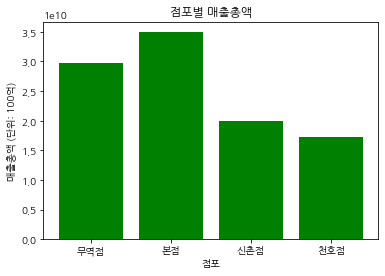

In [17]:
plt.bar(store_amount.index,store_amount,color='green')
plt.title('점포별 매출총액')
plt.xlabel('점포')
plt.ylabel('매출총액 (단위: 100억)')

### 지점별 평균할인율

In [18]:
data[data['amount']/10 != data['discount']]

,custid,date_time,store,product,brand,corner,pc,part,imported,amount,discount,installment,gender,time_label
11,1,2000-05-13 14:20,본점,4139150013080,비엘라수입,로얄수입행사,로얄부띠끄,로얄부띠끄,1,100000,0,3,1,2
12,1,2000-05-13 15:50,본점,4409230020400,팅클,아동특선,아동복,"케주얼,구두,아동",0,53000,2650,3,1,3
13,1,2000-05-13 16:20,본점,4400213022200,압소바,유아복,아동복,"케주얼,구두,아동",0,143500,7180,3,1,3
14,1,2000-05-13 17:50,본점,4121210013083,엠아이에스,로얄수입행사,로얄부띠끄,로얄부띠끄,1,256000,0,3,1,3
15,1,2000-05-14 10:40,본점,4120500010000,겐조수입의류,수입부띠끄,로얄부띠끄,로얄부띠끄,1,393000,19650,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036648,29998,2001-01-21 13:20,무역점,4241080013074,바닐라,영캐주얼,트랜디 케쥬얼,여성캐주얼,0,120000,0,3,0,2
1036649,29998,2001-04-07 16:33,무역점,2139141008000,랑콤,수입종합화장품,화장품,명품잡화,0,38000,1900,1,0,3
1036650,29999,2001-03-21 18:03,천호점,4109290004000,루이까또즈,핸드백,핸드백,잡화,0,46000,2300,1,0,4
1036651,29999,2001-03-29 18:23,천호점,4139350206500,소피에르핀,넥타이,셔츠,남성의류,0,49000,2450,1,0,4


In [19]:
discount_rate=data['discount']/data['amount']

In [20]:
data["discount_rate"] = discount_rate

In [21]:
data.head()

,custid,date_time,store,product,brand,corner,pc,part,imported,amount,discount,installment,gender,time_label,discount_rate
0,0,2000-06-25 12:12,무역점,2116050008000,에스티로더,수입종합화장품,화장품,명품잡화,1,90000,9000,3,1,2,0.1
1,0,2000-06-25 12:42,무역점,4125440008000,시슬리,수입종합화장품,화장품,명품잡화,1,39000,3900,1,1,2,0.1
2,0,2000-08-26 18:10,본점,2116052008000,크리니크,수입종합화장품,화장품,잡화파트,1,175000,17500,3,1,4,0.1
3,0,2000-08-26 18:30,본점,4106430119900,듀퐁,수입의류,명품토탈,잡화파트,1,455000,45500,3,1,4,0.1
4,0,2000-09-03 18:02,무역점,2139141008000,랑콤,수입종합화장품,화장품,명품잡화,0,100000,10000,3,1,4,0.1


In [22]:
store_discount_mean = data.groupby("store").mean()["discount_rate"]
store_discount_mean

store
무역점    0.028646
본점     0.027659
신촌점    0.025676
천호점    0.024847
Name: discount_rate, dtype: float64

In [23]:
store_discount_mean

store
무역점    0.028646
본점     0.027659
신촌점    0.025676
천호점    0.024847
Name: discount_rate, dtype: float64

Text(0, 0.5, '평균할인율 (단위: %)')

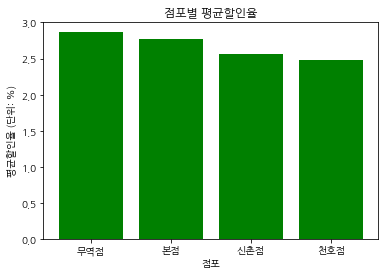

In [24]:
plt.bar(store_discount_mean.index,store_discount_mean*100,color='green')
plt.title('점포별 평균할인율')
plt.xlabel('점포')
plt.ylabel('평균할인율 (단위: %)')
#plt.text(store_discount_mean.index,store_discount_mean*100,"%")

### 지점별 수입품목과 국내품목 판매금액비중

In [25]:
store_amount_imported = data.groupby(["store","imported"]).sum()["amount"]
store_amount_imported

store  imported
무역점    0           23294965494
       1            6501835580
본점     0           23809070036
       1           11124234573
신촌점    0           17929476902
       1            2074444870
천호점    0           14859918927
       1            2467723300
Name: amount, dtype: int64

In [26]:
store_amount_imported = data.groupby(["store","imported"]).sum().unstack()["amount"]
store_amount_imported 

imported,0,1
store,,
무역점,23294965494,6501835580
본점,23809070036,11124234573
신촌점,17929476902,2074444870
천호점,14859918927,2467723300


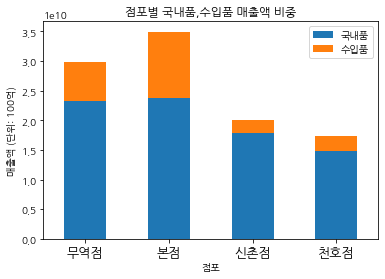

In [27]:
store_amount_imported.plot(kind='bar', stacked=True)
plt.xticks(rotation=0, fontsize=13)
plt.title("점포별 국내품,수입품 매출액 비중")
plt.ylabel("매출액 (단위: 100억)")
plt.xlabel("점포")
plt.legend(['국내품','수입품'])
plt.show()

### 각 지점별 남녀 성비

In [28]:
data['custid'].unique()

array([    0,     1,     2, ..., 29997, 29998, 29999], dtype=int64)

In [29]:
data['cnt'] = 1 

In [30]:
data.head()

,custid,date_time,store,product,brand,corner,pc,part,imported,amount,discount,installment,gender,time_label,discount_rate,cnt
0,0,2000-06-25 12:12,무역점,2116050008000,에스티로더,수입종합화장품,화장품,명품잡화,1,90000,9000,3,1,2,0.1,1
1,0,2000-06-25 12:42,무역점,4125440008000,시슬리,수입종합화장품,화장품,명품잡화,1,39000,3900,1,1,2,0.1,1
2,0,2000-08-26 18:10,본점,2116052008000,크리니크,수입종합화장품,화장품,잡화파트,1,175000,17500,3,1,4,0.1,1
3,0,2000-08-26 18:30,본점,4106430119900,듀퐁,수입의류,명품토탈,잡화파트,1,455000,45500,3,1,4,0.1,1
4,0,2000-09-03 18:02,무역점,2139141008000,랑콤,수입종합화장품,화장품,명품잡화,0,100000,10000,3,1,4,0.1,1


In [31]:
무역점 =data.groupby('store').get_group('무역점')
무역점.head()

,custid,date_time,store,product,brand,corner,pc,part,imported,amount,discount,installment,gender,time_label,discount_rate,cnt
0,0,2000-06-25 12:12,무역점,2116050008000,에스티로더,수입종합화장품,화장품,명품잡화,1,90000,9000,3,1,2,0.1,1
1,0,2000-06-25 12:42,무역점,4125440008000,시슬리,수입종합화장품,화장품,명품잡화,1,39000,3900,1,1,2,0.1,1
4,0,2000-09-03 18:02,무역점,2139141008000,랑콤,수입종합화장품,화장품,명품잡화,0,100000,10000,3,1,4,0.1,1
5,0,2000-09-03 18:42,무역점,4300381019900,CP컴퍼니,캐릭터캐주얼,캐릭터정장,남성의류,0,113000,11300,3,1,4,0.1,1
6,0,2000-09-03 19:30,무역점,6315960019900,폴로,트래디셔널,트래디셔널,골프/유니캐쥬얼,0,118000,11800,3,1,4,0.1,1


In [32]:
본점 =data.groupby('store').get_group('본점')
천호점 = data.groupby('store').get_group('천호점')
신촌점 = data.groupby('store').get_group('신촌점')

In [33]:
무역점_temp = 무역점.groupby('custid').sum()
무역점_temp

,product,imported,amount,discount,installment,gender,time_label,discount_rate,cnt
custid,,,,,,,,,
0,18996972063800,2,460000,46000,13,5,16,0.500000,5
1,18349240069216,0,542000,0,8,4,12,0.000000,4
2,35241547907500,0,3161500,196150,31,8,22,0.500000,8
3,15239601082177,0,462500,20440,12,0,8,0.175479,4
4,16783521144148,1,1045000,21800,18,0,8,0.100000,4
...,...,...,...,...,...,...,...,...,...
29994,65701853727394,7,1396127,54700,47,0,58,0.550000,18
29995,174427961581788,5,8779300,234370,72,42,119,1.650000,42
29996,77134352429133,2,1407300,113800,23,0,51,1.400000,19


In [34]:
무역점_male_cnt=len(무역점_temp[무역점_temp["gender"]>0])
무역점_male_cnt

5285

In [35]:
무역점_female_cnt=len(무역점_temp[무역점_temp["gender"]==0])
무역점_female_cnt

10823

In [36]:
본점_temp = 본점.groupby('custid').sum()
천호점_temp = 천호점.groupby('custid').sum()
신촌점_temp = 신촌점.groupby('custid').sum()

In [37]:
본점_male_cnt=len(본점_temp[본점_temp["gender"]>0])
천호점_male_cnt=len(천호점_temp[천호점_temp["gender"]>0])
신촌점_male_cnt=len(신촌점_temp[신촌점_temp["gender"]>0])

본점_female_cnt=len(본점_temp[본점_temp["gender"]==0])
천호점_female_cnt=len(천호점_temp[천호점_temp["gender"]==0])
신촌점_female_cnt=len(신촌점_temp[신촌점_temp["gender"]==0])

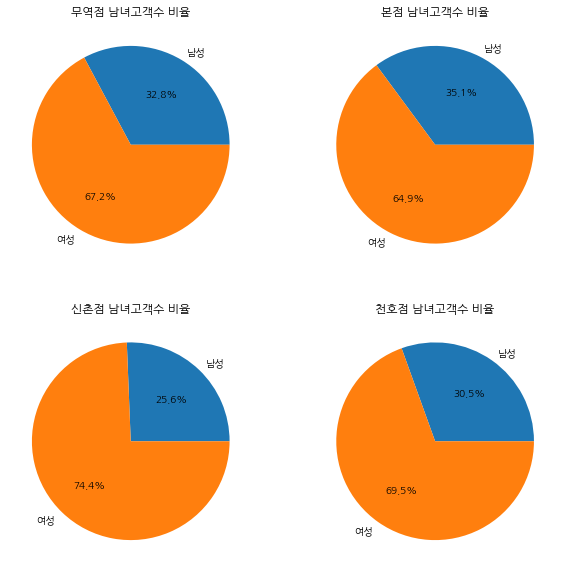

In [38]:
plt.figure(figsize=(10,10))
grid=plt.GridSpec(2,2)

plt.subplot(grid[0,0])
ratio = [무역점_male_cnt,무역점_female_cnt]
labels = ["남성","여성"]
plt.pie(ratio,labels=labels,autopct="%.1f%%")
plt.title("무역점 남녀고객수 비율")

plt.subplot(grid[0,1])
ratio = [본점_male_cnt,본점_female_cnt]
labels = ["남성","여성"]
plt.pie(ratio,labels=labels,autopct="%.1f%%")
plt.title("본점 남녀고객수 비율")

plt.subplot(grid[1,0])
ratio = [신촌점_male_cnt,신촌점_female_cnt]
labels = ["남성","여성"]
plt.pie(ratio,labels=labels,autopct="%.1f%%")
plt.title("신촌점 남녀고객수 비율")

plt.subplot(grid[1,1])
ratio = [천호점_male_cnt,천호점_female_cnt]
labels = ["남성","여성"]
plt.pie(ratio,labels=labels,autopct="%.1f%%")
plt.title("천호점 남녀고객수 비율")

plt.show()

### 지점별 남녀 매출액 비중

In [39]:
무역점_male_amount=무역점_temp[무역점_temp["gender"]>0].sum()['amount']
본점_male_amount=본점_temp[본점_temp["gender"]>0].sum()['amount']
신촌점_male_amount=신촌점_temp[신촌점_temp["gender"]>0].sum()['amount']
천호점_male_amount=천호점_temp[천호점_temp["gender"]>0].sum()['amount']

무역점_female_amount=무역점_temp[무역점_temp["gender"]==0].sum()['amount']
본점_female_amount=본점_temp[본점_temp["gender"]==0].sum()['amount']
신촌점_female_amount=신촌점_temp[신촌점_temp["gender"]==0].sum()['amount']
천호점_female_amount=천호점_temp[천호점_temp["gender"]==0].sum()['amount']

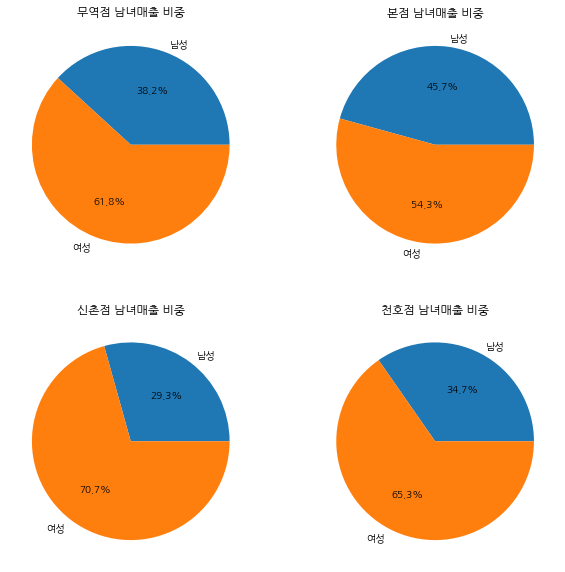

In [40]:
plt.figure(figsize=(10,10))
grid=plt.GridSpec(2,2)

plt.subplot(grid[0,0])
ratio = [무역점_male_amount,무역점_female_amount]
labels = ["남성","여성"]
plt.pie(ratio,labels=labels,autopct="%.1f%%")
plt.title("무역점 남녀매출 비중")

plt.subplot(grid[0,1])
ratio = [본점_male_amount,본점_female_amount]
labels = ["남성","여성"]
plt.pie(ratio,labels=labels,autopct="%.1f%%")
plt.title("본점 남녀매출 비중")

plt.subplot(grid[1,0])
ratio = [신촌점_male_amount,신촌점_female_amount]
labels = ["남성","여성"]
plt.pie(ratio,labels=labels,autopct="%.1f%%")
plt.title("신촌점 남녀매출 비중")

plt.subplot(grid[1,1])
ratio = [천호점_male_amount,천호점_female_amount]
labels = ["남성","여성"]
plt.pie(ratio,labels=labels,autopct="%.1f%%")
plt.title("천호점 남녀매출 비중")

plt.show()

### 남녀성비와 매출비중 한번에 보기

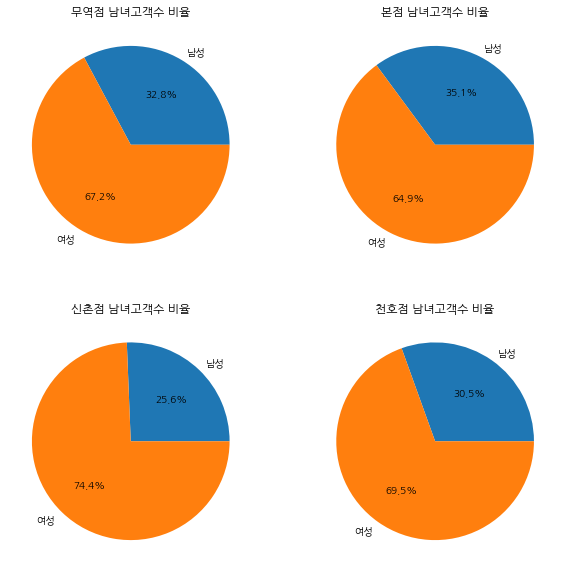

In [41]:
plt.figure(figsize=(10,10))
grid=plt.GridSpec(2,2)

plt.subplot(grid[0,0])
ratio = [무역점_male_cnt,무역점_female_cnt]
labels = ["남성","여성"]
plt.pie(ratio,labels=labels,autopct="%.1f%%")
plt.title("무역점 남녀고객수 비율")

plt.subplot(grid[0,1])
ratio = [본점_male_cnt,본점_female_cnt]
labels = ["남성","여성"]
plt.pie(ratio,labels=labels,autopct="%.1f%%")
plt.title("본점 남녀고객수 비율")

plt.subplot(grid[1,0])
ratio = [신촌점_male_cnt,신촌점_female_cnt]
labels = ["남성","여성"]
plt.pie(ratio,labels=labels,autopct="%.1f%%")
plt.title("신촌점 남녀고객수 비율")

plt.subplot(grid[1,1])
ratio = [천호점_male_cnt,천호점_female_cnt]
labels = ["남성","여성"]
plt.pie(ratio,labels=labels,autopct="%.1f%%")
plt.title("천호점 남녀고객수 비율")

plt.show()

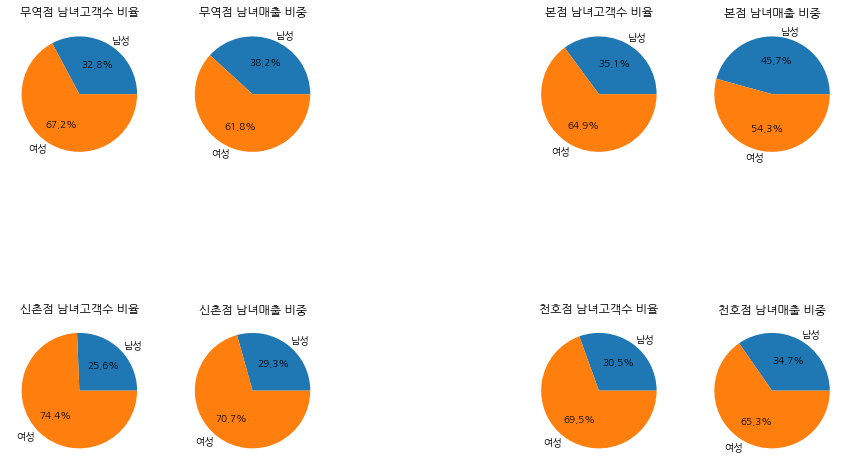

In [42]:
plt.figure(figsize=(15,10))
grid=plt.GridSpec(2,5)

plt.subplot(grid[0,0])
ratio = [무역점_male_cnt,무역점_female_cnt]
labels = ["남성","여성"]
plt.pie(ratio,labels=labels,autopct="%.1f%%")
plt.title("무역점 남녀고객수 비율")

plt.subplot(grid[0,1])
ratio = [무역점_male_amount,무역점_female_amount]
labels = ["남성","여성"]
plt.pie(ratio,labels=labels,autopct="%.1f%%")
plt.title("무역점 남녀매출 비중")



plt.subplot(grid[0,3])
ratio = [본점_male_cnt,본점_female_cnt]
labels = ["남성","여성"]
plt.pie(ratio,labels=labels,autopct="%.1f%%")
plt.title("본점 남녀고객수 비율")

plt.subplot(grid[0,4])
ratio = [본점_male_amount,본점_female_amount]
labels = ["남성","여성"]
plt.pie(ratio,labels=labels,autopct="%.1f%%")
plt.title("본점 남녀매출 비중")



plt.subplot(grid[1,0])
ratio = [신촌점_male_cnt,신촌점_female_cnt]
labels = ["남성","여성"]
plt.pie(ratio,labels=labels,autopct="%.1f%%")
plt.title("신촌점 남녀고객수 비율")

plt.subplot(grid[1,1])
ratio = [신촌점_male_amount,신촌점_female_amount]
labels = ["남성","여성"]
plt.pie(ratio,labels=labels,autopct="%.1f%%")
plt.title("신촌점 남녀매출 비중")



plt.subplot(grid[1,3])
ratio = [천호점_male_cnt,천호점_female_cnt]
labels = ["남성","여성"]
plt.pie(ratio,labels=labels,autopct="%.1f%%")
plt.title("천호점 남녀고객수 비율")

plt.subplot(grid[1,4])
ratio = [천호점_male_amount,천호점_female_amount]
labels = ["남성","여성"]
plt.pie(ratio,labels=labels,autopct="%.1f%%")
plt.title("천호점 남녀매출 비중")

plt.show()

### 지점별 고객 등급별 고객수_현재기준

#### 고객등급표

- 쟈스민 블랙: 85000마일리지 8500만원
- 쟈스민 블루: 65000마일리지 6500만원
- 쟈스민     : 40000마일리지 4000만원
- 세이지     : 20000마일리지 2000만원
- 그린       :  5000마일리지  500만원


In [43]:
#쟈스민 블랙_현재기준
무역점_jsblack_cnt_current = len(무역점_temp[무역점_temp['amount']>85000000])
본점_jsblack_cnt_current = len(본점_temp[본점_temp['amount']>85000000])
신촌점_jsblack_cnt_current = len(신촌점_temp[신촌점_temp['amount']>85000000])
천호점_jsblack_cnt_current = len(천호점_temp[천호점_temp['amount']>85000000])
print(무역점_jsblack_cnt_current)
print(본점_jsblack_cnt_current)
print(신촌점_jsblack_cnt_current)
print(천호점_jsblack_cnt_current)

0
4
1
0


In [44]:
#쟈스민 블루_현재기준
무역점_jsblue_cnt_current = len(무역점_temp[무역점_temp['amount']>65000000])
본점_jsblue_cnt_current = len(본점_temp[본점_temp['amount']>65000000])
신촌점_jsblue_cnt_current = len(신촌점_temp[신촌점_temp['amount']>65000000])
천호점_jsblue_cnt_current = len(천호점_temp[천호점_temp['amount']>65000000])

무역점_jsblue_cnt_current= 무역점_jsblue_cnt_current-무역점_jsblack_cnt_current
본점_jsblue_cnt_current= 본점_jsblue_cnt_current-본점_jsblack_cnt_current
신촌점_jsblue_cnt_current= 신촌점_jsblue_cnt_current-신촌점_jsblack_cnt_current
천호점_jsblue_cnt_current= 천호점_jsblue_cnt_current-천호점_jsblack_cnt_current

print(무역점_jsblue_cnt_current)
print(본점_jsblue_cnt_current)
print(신촌점_jsblue_cnt_current)
print(천호점_jsblue_cnt_current)

1
4
0
1


In [45]:
#쟈스민_현재기준
무역점_js_cnt_current = len(무역점_temp[무역점_temp['amount']>40000000])
본점_js_cnt_current = len(본점_temp[본점_temp['amount']>40000000])
신촌점_js_cnt_current = len(신촌점_temp[신촌점_temp['amount']>40000000])
천호점_js_cnt_current = len(천호점_temp[천호점_temp['amount']>40000000])

무역점_js_cnt_current= 무역점_js_cnt_current-무역점_jsblue_cnt_current
본점_js_cnt_current= 본점_js_cnt_current-본점_jsblue_cnt_current
신촌점_js_cnt_current= 신촌점_js_cnt_current-신촌점_jsblue_cnt_current
천호점_js_cnt_current= 천호점_js_cnt_current-천호점_jsblue_cnt_current

print(무역점_js_cnt_current)
print(본점_js_cnt_current)
print(신촌점_js_cnt_current)
print(천호점_js_cnt_current)

8
31
2
2


In [46]:
#세이지_현재기준
무역점_sage_cnt_current = len(무역점_temp[무역점_temp['amount']>20000000])
본점_sage_cnt_current = len(본점_temp[본점_temp['amount']>20000000])
신촌점_sage_cnt_current = len(신촌점_temp[신촌점_temp['amount']>20000000])
천호점_sage_cnt_current = len(천호점_temp[천호점_temp['amount']>20000000])

무역점_sage_cnt_current= 무역점_sage_cnt_current-무역점_js_cnt_current
본점_sage_cnt_current= 본점_sage_cnt_current-본점_js_cnt_current
신촌점_sage_cnt_current= 신촌점_sage_cnt_current-신촌점_js_cnt_current
천호점_sage_cnt_current= 천호점_sage_cnt_current-천호점_js_cnt_current

print(무역점_sage_cnt_current)
print(본점_sage_cnt_current)
print(신촌점_sage_cnt_current)
print(천호점_sage_cnt_current)

101
160
29
52


In [47]:
#그린_현재기준
무역점_green_cnt_current = len(무역점_temp[무역점_temp['amount']>5000000])
본점_green_cnt_current = len(본점_temp[본점_temp['amount']>5000000])
신촌점_green_cnt_current = len(신촌점_temp[신촌점_temp['amount']>5000000])
천호점_green_cnt_current = len(천호점_temp[천호점_temp['amount']>5000000])

무역점_green_cnt_current= 무역점_green_cnt_current-무역점_sage_cnt_current
본점_green_cnt_current= 본점_green_cnt_current-본점_sage_cnt_current
신촌점_green_cnt_current= 신촌점_green_cnt_current-신촌점_sage_cnt_current
천호점_green_cnt_current= 천호점_green_cnt_current-천호점_sage_cnt_current

print(무역점_green_cnt_current)
print(본점_green_cnt_current)
print(신촌점_green_cnt_current)
print(천호점_green_cnt_current)

1382
1710
922
860


### 지점별 고객 등급별 고객수_물가상승률과 개월수 고려

#### 고객등급표(12개월 구매액)

- 쟈스민 블랙: 85000마일리지 49,165,416원
- 쟈스민 블루: 65000마일리지 37,597,083원
- 쟈스민     : 40000마일리지 23,136,666원
- 세이지     : 20000마일리지 11,568,333원
- 그린       :  5000마일리지  2,892,083원


#### 현재 가지고 있는데이터는 <2000-06-25 ~ 2001-04-21> 11개월 데이터이기 때문에 12로 나눈뒤 11을 곱한 값으로 산정

In [48]:
#쟈스민 블랙_물가_개월수고려
무역점_jsblack_cnt = len(무역점_temp[무역점_temp['amount']>53635000/12*11])
본점_jsblack_cnt = len(본점_temp[본점_temp['amount']>53635000/12*11])
신촌점_jsblack_cnt = len(신촌점_temp[신촌점_temp['amount']>53635000/12*11])
천호점_jsblack_cnt = len(천호점_temp[천호점_temp['amount']>53635000/12*11])
print(무역점_jsblack_cnt)
print(본점_jsblack_cnt)
print(신촌점_jsblack_cnt)
print(천호점_jsblack_cnt)

3
22
2
2


In [49]:
#쟈스민 블루_물가_개월수고려
무역점_jsblue_cnt = len(무역점_temp[(무역점_temp['amount']>41015000/12*11)])
본점_jsblue_cnt= len(본점_temp[본점_temp['amount']>41015000/12*11])
신촌점_jsblue_cnt = len(신촌점_temp[신촌점_temp['amount']>41015000/12*11])
천호점_jsblue_cnt = len(천호점_temp[천호점_temp['amount']>41015000/12*11])

무역점_jsblue_cnt= 무역점_jsblue_cnt-무역점_jsblack_cnt
본점_jsblue_cnt= 본점_jsblue_cnt-본점_jsblack_cnt
신촌점_jsblue_cnt= 신촌점_jsblue_cnt-신촌점_jsblack_cnt
천호점_jsblue_cnt= 천호점_jsblue_cnt-천호점_jsblack_cnt

print(무역점_jsblue_cnt)
print(본점_jsblue_cnt)
print(신촌점_jsblue_cnt)
print(천호점_jsblue_cnt)

10
21
2
4


In [50]:
#쟈스민_물가_개월수고려
무역점_js_cnt = len(무역점_temp[무역점_temp['amount']>25240000/12*11])
본점_js_cnt = len(본점_temp[본점_temp['amount']>25240000/12*11])
신촌점_js_cnt = len(신촌점_temp[신촌점_temp['amount']>25240000/12*11])
천호점_js_cnt = len(천호점_temp[천호점_temp['amount']>25240000/12*11])

무역점_js_cnt= 무역점_js_cnt-무역점_jsblue_cnt-무역점_jsblack_cnt
본점_js_cnt= 본점_js_cnt-본점_jsblue_cnt-본점_jsblack_cnt
신촌점_js_cnt= 신촌점_js_cnt-신촌점_jsblue_cnt-신촌점_jsblack_cnt
천호점_js_cnt= 천호점_js_cnt-천호점_jsblue_cnt-천호점_jsblack_cnt

print(무역점_js_cnt)
print(본점_js_cnt)
print(신촌점_js_cnt)
print(천호점_js_cnt)

59
105
14
23


In [51]:
#세이지_물가_개월수고려
무역점_sage_cnt = len(무역점_temp[무역점_temp['amount']>12620000/12*11])
본점_sage_cnt = len(본점_temp[본점_temp['amount']>12620000/12*11])
신촌점_sage_cnt = len(신촌점_temp[신촌점_temp['amount']>12620000/12*11])
천호점_sage_cnt = len(천호점_temp[천호점_temp['amount']>12620000/12*11])

무역점_sage_cnt= 무역점_sage_cnt-무역점_js_cnt-무역점_jsblue_cnt-무역점_jsblack_cnt
본점_sage_cnt= 본점_sage_cnt-본점_js_cnt-본점_jsblue_cnt-본점_jsblack_cnt
신촌점_sage_cnt= 신촌점_sage_cnt-신촌점_js_cnt-신촌점_jsblue_cnt-신촌점_jsblack_cnt
천호점_sage_cnt= 천호점_sage_cnt-천호점_js_cnt-천호점_jsblue_cnt-천호점_jsblack_cnt

print(무역점_sage_cnt)
print(본점_sage_cnt)
print(신촌점_sage_cnt)
print(천호점_sage_cnt)

294
432
145
170


In [52]:
#그린_물가_개월수고려
무역점_green_cnt = len(무역점_temp[무역점_temp['amount']>3155000/12*11])
본점_green_cnt = len(본점_temp[본점_temp['amount']>3155000/12*11])
신촌점_green_cnt = len(신촌점_temp[신촌점_temp['amount']>3155000/12*11])
천호점_green_cnt = len(천호점_temp[천호점_temp['amount']>3155000/12*11])

무역점_green_cnt= 무역점_green_cnt-무역점_sage_cnt-무역점_js_cnt-무역점_jsblue_cnt-무역점_jsblack_cnt
본점_green_cnt= 본점_green_cnt-본점_sage_cnt-본점_js_cnt-본점_jsblue_cnt-본점_jsblack_cnt
신촌점_green_cnt= 신촌점_green_cnt-신촌점_sage_cnt-신촌점_js_cnt-신촌점_jsblue_cnt-신촌점_jsblack_cnt
천호점_green_cnt= 천호점_green_cnt-천호점_sage_cnt-천호점_js_cnt-천호점_jsblue_cnt-천호점_jsblack_cnt

print(무역점_green_cnt)
print(본점_green_cnt)
print(신촌점_green_cnt)
print(천호점_green_cnt)

2469
2627
1847
1597


In [53]:
#노멀_물가_개월수고려
무역점_normal_cnt = len(무역점_temp) - 무역점_green_cnt-무역점_sage_cnt-무역점_js_cnt-무역점_jsblue_cnt-무역점_jsblack_cnt
본점_normal_cnt= len(본점_temp) - 본점_green_cnt-본점_sage_cnt-본점_js_cnt-본점_jsblue_cnt-본점_jsblack_cnt
신촌점_normal_cnt = len(신촌점_temp) - 신촌점_green_cnt-신촌점_sage_cnt-신촌점_js_cnt-신촌점_jsblue_cnt-신촌점_jsblack_cnt
천호점_normal_cnt = len(천호점_temp) - 천호점_green_cnt-천호점_sage_cnt-천호점_js_cnt-천호점_jsblue_cnt-천호점_jsblack_cnt

print(무역점_normal_cnt)
print(본점_normal_cnt)
print(신촌점_normal_cnt)
print(천호점_normal_cnt)

13273
11120
9622
5849


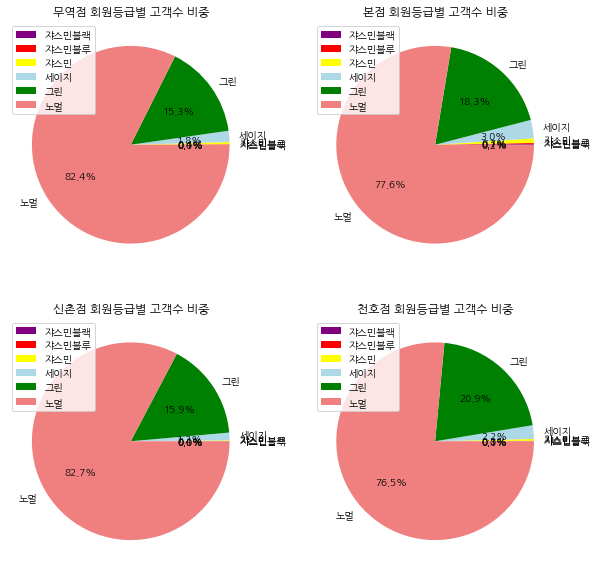

In [54]:
plt.figure(figsize=(10,10))
grid=plt.GridSpec(2,2)

plt.subplot(grid[0,0])
ratio = [무역점_jsblack_cnt,무역점_jsblue_cnt,무역점_js_cnt,무역점_sage_cnt,무역점_green_cnt,무역점_normal_cnt]
labels = ["쟈스민블랙","쟈스민블루","쟈스민","세이지","그린","노멀"]
colors=['purple','red','yellow','lightblue','green','lightcoral']
plt.pie(ratio,labels=labels,colors=colors,autopct="%.1f%%")
plt.title("무역점 회원등급별 고객수 비중")
plt.legend()

plt.subplot(grid[0,1])
ratio = [본점_jsblack_cnt,본점_jsblue_cnt,본점_js_cnt,본점_sage_cnt,본점_green_cnt,본점_normal_cnt]
labels = ["쟈스민블랙","쟈스민블루","쟈스민","세이지","그린","노멀"]
colors=['purple','red','yellow','lightblue','green','lightcoral']
plt.pie(ratio,labels=labels,colors=colors,autopct="%.1f%%")
plt.title("본점 회원등급별 고객수 비중")
plt.legend()

plt.subplot(grid[1,0])
ratio = [신촌점_jsblack_cnt,신촌점_jsblue_cnt,신촌점_js_cnt,신촌점_sage_cnt,신촌점_green_cnt,신촌점_normal_cnt]
labels = ["쟈스민블랙","쟈스민블루","쟈스민","세이지","그린","노멀"]
colors=['purple','red','yellow','lightblue','green','lightcoral']
plt.pie(ratio,labels=labels,colors=colors,autopct="%.1f%%")
plt.title("신촌점 회원등급별 고객수 비중")
plt.legend()

plt.subplot(grid[1,1])
ratio = [천호점_jsblack_cnt,천호점_jsblue_cnt,천호점_js_cnt,천호점_sage_cnt,천호점_green_cnt,천호점_normal_cnt]
labels = ["쟈스민블랙","쟈스민블루","쟈스민","세이지","그린","노멀"]
colors=['purple','red','yellow','lightblue','green','lightcoral']
plt.pie(ratio,labels=labels,colors=colors,autopct="%.1f%%")
plt.title("천호점 회원등급별 고객수 비중")
plt.legend()

plt.show()

### 지점별 고객 등급별 구매액 비중_물가상승률과 개월수 고려

In [55]:
#쟈스민_블랙_매출액합
무역점_jsblack_amount=무역점_temp[무역점_temp['amount']>53635000/12*11]['amount'].sum()
본점_jsblack_amount=본점_temp[본점_temp['amount']>53635000/12*11]['amount'].sum()
신촌점_jsblack_amount=신촌점_temp[신촌점_temp['amount']>53635000/12*11]['amount'].sum()
천호점_jsblack_amount=천호점_temp[천호점_temp['amount']>53635000/12*11]['amount'].sum()

In [56]:
#쟈스민_블루_매출액합
무역점_jsblue_amount=무역점_temp[(무역점_temp['amount']>41015000/12*11)]['amount'].sum()
본점_jsblue_amount=본점_temp[본점_temp['amount']>41015000/12*11]['amount'].sum()
신촌점_jsblue_amount=신촌점_temp[신촌점_temp['amount']>41015000/12*11]['amount'].sum()
천호점_jsblue_amount=천호점_temp[천호점_temp['amount']>41015000/12*11]['amount'].sum()

In [57]:
#쟈스민_매출액합
무역점_js_amount=무역점_temp[(무역점_temp['amount']>25240000/12*11)]['amount'].sum()
본점_js_amount=본점_temp[본점_temp['amount']>25240000/12*11]['amount'].sum()
신촌점_js_amount=신촌점_temp[신촌점_temp['amount']>25240000/12*11]['amount'].sum()
천호점_js_amount=천호점_temp[천호점_temp['amount']>25240000/12*11]['amount'].sum()

In [58]:
#세이지_매출액합
무역점_sage_amount=무역점_temp[(무역점_temp['amount']>12620000/12*11)]['amount'].sum()
본점_sage_amount=본점_temp[본점_temp['amount']>12620000/12*11]['amount'].sum()
신촌점_sage_amount=신촌점_temp[신촌점_temp['amount']>12620000/12*11]['amount'].sum()
천호점_sage_amount=천호점_temp[천호점_temp['amount']>12620000/12*11]['amount'].sum()

In [59]:
#그린_매출액합
무역점_green_amount=무역점_temp[(무역점_temp['amount']>3155000/12*11)]['amount'].sum()
본점_green_amount=본점_temp[본점_temp['amount']>3155000/12*11]['amount'].sum()
신촌점_green_amount=신촌점_temp[신촌점_temp['amount']>3155000/12*11]['amount'].sum()
천호점_green_amount=천호점_temp[천호점_temp['amount']>3155000/12*11]['amount'].sum()

In [60]:
#노멀_매출액합
무역점_normal_amount=무역점_temp[(무역점_temp['amount']<=3155000/12*11)]['amount'].sum()
본점_normal_amount=본점_temp[본점_temp['amount']<=3155000/12*11]['amount'].sum()
신촌점_normal_amount=신촌점_temp[신촌점_temp['amount']<=3155000/12*11]['amount'].sum()
천호점_normal_amount=천호점_temp[천호점_temp['amount']<=3155000/12*11]['amount'].sum()

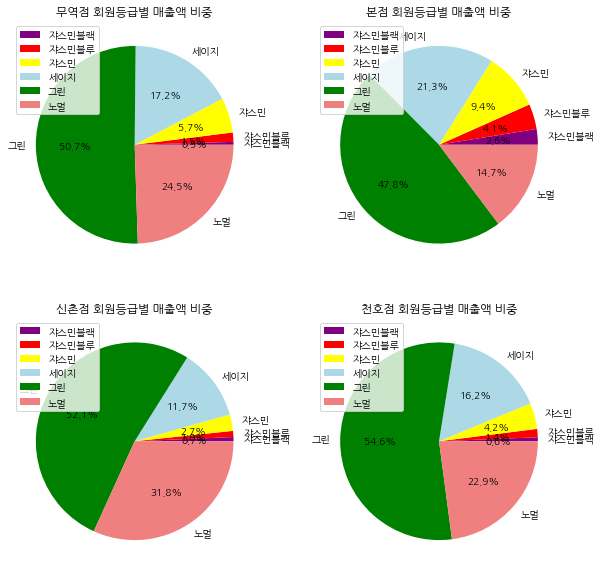

In [61]:
plt.figure(figsize=(10,10))
grid=plt.GridSpec(2,2)

plt.subplot(grid[0,0])
ratio = [무역점_jsblack_amount,무역점_jsblue_amount,무역점_js_amount,무역점_sage_amount,무역점_green_amount,무역점_normal_amount]
labels = ["쟈스민블랙","쟈스민블루","쟈스민","세이지","그린","노멀"]
colors=['purple','red','yellow','lightblue','green','lightcoral']
plt.pie(ratio,labels=labels,colors=colors,autopct="%.1f%%")
plt.title("무역점 회원등급별 매출액 비중")
plt.legend()

plt.subplot(grid[0,1])
ratio = [본점_jsblack_amount,본점_jsblue_amount,본점_js_amount,본점_sage_amount,본점_green_amount,본점_normal_amount]
labels = ["쟈스민블랙","쟈스민블루","쟈스민","세이지","그린","노멀"]
colors=['purple','red','yellow','lightblue','green','lightcoral']
plt.pie(ratio,labels=labels,colors=colors,autopct="%.1f%%")
plt.title("본점 회원등급별 매출액 비중")
plt.legend(loc=2)

plt.subplot(grid[1,0])
ratio = [신촌점_jsblack_amount,신촌점_jsblue_amount,신촌점_js_amount,신촌점_sage_amount,신촌점_green_amount,신촌점_normal_amount]
labels = ["쟈스민블랙","쟈스민블루","쟈스민","세이지","그린","노멀"]
colors=['purple','red','yellow','lightblue','green','lightcoral']
plt.pie(ratio,labels=labels,colors=colors,autopct="%.1f%%")
plt.title("신촌점 회원등급별 매출액 비중")
plt.legend()

plt.subplot(grid[1,1])
ratio = [천호점_jsblack_amount,천호점_jsblue_amount,천호점_js_amount,천호점_sage_amount,천호점_green_amount,천호점_normal_amount]
labels = ["쟈스민블랙","쟈스민블루","쟈스민","세이지","그린","노멀"]
colors=['purple','red','yellow','lightblue','green','lightcoral']
plt.pie(ratio,labels=labels,colors=colors,autopct="%.1f%%")
plt.title("천호점 회원등급별 매출액 비중")
plt.legend()

plt.show()

### 성별 인기 있는 품목_ 코너 

In [62]:
data

,custid,date_time,store,product,brand,corner,pc,part,imported,amount,discount,installment,gender,time_label,discount_rate,cnt
0,0,2000-06-25 12:12,무역점,2116050008000,에스티로더,수입종합화장품,화장품,명품잡화,1,90000,9000,3,1,2,0.10,1
1,0,2000-06-25 12:42,무역점,4125440008000,시슬리,수입종합화장품,화장품,명품잡화,1,39000,3900,1,1,2,0.10,1
2,0,2000-08-26 18:10,본점,2116052008000,크리니크,수입종합화장품,화장품,잡화파트,1,175000,17500,3,1,4,0.10,1
3,0,2000-08-26 18:30,본점,4106430119900,듀퐁,수입의류,명품토탈,잡화파트,1,455000,45500,3,1,4,0.10,1
4,0,2000-09-03 18:02,무역점,2139141008000,랑콤,수입종합화장품,화장품,명품잡화,0,100000,10000,3,1,4,0.10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036648,29998,2001-01-21 13:20,무역점,4241080013074,바닐라,영캐주얼,트랜디 케쥬얼,여성캐주얼,0,120000,0,3,0,2,0.00,1
1036649,29998,2001-04-07 16:33,무역점,2139141008000,랑콤,수입종합화장품,화장품,명품잡화,0,38000,1900,1,0,3,0.05,1
1036650,29999,2001-03-21 18:03,천호점,4109290004000,루이까또즈,핸드백,핸드백,잡화,0,46000,2300,1,0,4,0.05,1
1036651,29999,2001-03-29 18:23,천호점,4139350206500,소피에르핀,넥타이,셔츠,남성의류,0,49000,2450,1,0,4,0.05,1


In [63]:
data.sort_values(by="product")

,custid,date_time,store,product,brand,corner,pc,part,imported,amount,discount,installment,gender,time_label,discount_rate,cnt
874714,25208,2000-05-10 12:00,본점,2101013000150,씨그너스넥타이,넥타이,섬유잡화,잡화파트,0,75000,0,1,1,2,0.0,1
244394,6894,2000-05-10 16:50,본점,2101013000150,씨그너스넥타이,넥타이,섬유잡화,잡화파트,0,38000,0,1,0,3,0.0,1
891826,25698,2000-05-08 15:50,본점,2101013000150,씨그너스넥타이,넥타이,섬유잡화,잡화파트,0,25000,0,1,1,3,0.0,1
616697,17677,2000-05-07 16:00,본점,2101013000150,씨그너스넥타이,넥타이,섬유잡화,잡화파트,0,19000,0,1,0,3,0.0,1
183949,5173,2000-05-07 13:20,본점,2101013000150,씨그너스넥타이,넥타이,섬유잡화,잡화파트,0,19000,0,1,1,2,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653620,18731,2000-06-11 13:40,무역점,8801192410767,미등록상품,가정잡화,생활용품,공산품,0,14600,0,1,0,2,0.0,1
383165,10978,2000-06-16 16:30,무역점,8801192410767,미등록상품,가정잡화,생활용품,공산품,0,24000,0,1,0,3,0.0,1
999041,28848,2000-06-09 12:00,무역점,8801192410767,미등록상품,가정잡화,생활용품,공산품,0,6800,0,1,0,2,0.0,1
706713,20321,2000-06-05 13:50,무역점,8801192410767,미등록상품,가정잡화,생활용품,공산품,0,24500,0,1,1,2,0.0,1


In [64]:
data['part'].unique()

array(['명품잡화', '잡화파트', '남성의류', '골프/유니캐쥬얼', '로얄부띠끄', '케주얼,구두,아동', '여성캐주얼',
       '여성의류파트', '가정용품', '가정용품파트', '남성정장스포츠', '아동', '잡화', '영어덜트캐쥬얼',
       '영라이브', '공산품', '스포츠캐쥬얼', '여성정장', '아동문화', '공산품파트', '생식품파트', '영플라자',
       '생식품', '패션잡화', '아동,스포츠', '로얄부틱', '여성캐쥬얼', '스포츠캐주얼', '영캐릭터',
       '상품개발영업1과', '인터넷백화점'], dtype=object)

In [65]:
data['pc'].unique()

array(['화장품', '명품토탈', '캐릭터정장', '트래디셔널', '로얄부띠끄', '아동복', '내의란제리', '영트렌디',
       '캐릭터캐쥬얼', '여성캐주얼', '가전', '섬유잡화', '장신구', '트랜디 케쥬얼', '식기', '골프',
       '수예', '유아/완구', '패션슈즈', '영트랜디', '조리식품', '진캐주얼', '스포츠', '아동',
       '트래디셔널캐쥬얼', '가전/문화', '셔츠', '란제리', '영캐릭터캐쥬얼', '엘레강스캐쥬얼', '트레디셔널',
       '정장', '일반식품', '축산물', '미확인pc', '진케주얼', '농산물', '문화용품', '생활용품', '문화',
       '니트,단품,모피', '소품', '수산물', '미씨캐주얼', '타운란제리', '피혁A', '여성구두',
       '디자이너부띠크', '핸드백', '진캐쥬얼', '명품시즌', '남여구두', '쇼핑보증', '수입명품', '로얄부틱',
       '디자이너부틱', '미씨캐릭터', '캐쥬얼', '캐주얼', '영캐주얼', '섬유', '어덜트캐주얼', '침구수예',
       '디자이너부띠끄', '악세사리', '캐릭터캐주얼', '피혁B', '니트/단품', '침구/수예', '가구', '남성잡화',
       '패션시즌', '수입의류', '침구,수예', '(주)현스포츠아쌤', '용기보증', '아르모니아', '사이버쇼핑'],
      dtype=object)

In [66]:
data['corner'].unique()

array(['수입종합화장품', '수입의류', '캐릭터캐주얼', '트래디셔널', '로얄수입행사', '아동특선', '유아복',
       '수입부띠끄', '란제리', '영트랜드', '캐릭터', '미시케쥬얼', '색조화장품', '가전특정', '스카프',
       '헤어ACC', '영캐주얼', '주방용품', '골프웨어', '브랜드침구', '캐릭터슈즈', '행사', '즉석조리',
       '진캐쥬얼', '스포츠슈즈', '아동복', '트래디셔널캐쥬얼', '영캐쥬얼', '취사소형', '넥타이', '미확인코너',
       '셔츠', '욕실용품', '스포츠단품', '캐릭터캐쥬얼', '골프(LC)', '니트웨어', '내셔날', '유아',
       '아동', '국내부띠끄', '수영복', '냉장식품', '수입', '정육', '용기보증', '진케주얼', '스포츠웨어',
       '야채', '하이캐쥬얼', '팬시', '음료', '가정잡화', '문화', '타운단품', '임대을', '양말', '내의',
       '차류', '진캐주얼', '모자', '임대을가전', '취미소품', '생선', '미씨캐릭터', '통병조림', '싸롱화',
       '조미료', '건식품', '여성구두', '모피니트', '골프(국내)', '신생아', '임대화장품', '완구(문화)',
       '스타킹', '소형전기', '머플러', '아웃도어', '타운웨어', '캐쥬얼구두', '잡화', '화장잡화', '테이프',
       '수입ACC', '임대구두', '완구', '드레스구두', '패션시계', '부띠끄', '일반조리', '슈즈',
       '로얄부틱2F', '수예침장', '곡물', '과자류', '의류기타', '엘레강스부틱', '일용잡화', '디자이너캐릭터',
       '어덜트', '스포츠캐주얼', '패스트푸드', '단품/행사1', '영커리어캐주얼', '단품', '트레디셔널캐주얼',
       '디자이너', '패션란제리', 'N/B침구', '주류', '스포츠용품', '피혁토탈(B

In [67]:
data['brand'].unique()

array(['에스티로더', '시슬리', '크리니크', ..., '마트마켓팅', '오더메이드', '모둠삼방'],
      dtype=object)

In [68]:
corner_sum = data.groupby(["corner","gender"]).sum()
corner_sum

custid           product  imported     amount  discount  \
corner  gender                                                              
DC캐주얼   0        4858353  1417541101545989         0   92589600   4671000   
        1        5130941  1580924377308561         0  110267400   6271850   
ERREVNO 1          10446     2800420013000         0      94000      4700   
GBR  지원 0         428699    89613658017300        32   11437000    265950   
        1         671918   126019206586870        45   24452000    338850   
...                  ...               ...       ...        ...       ...   
화장잡화    1        7041502  1938328183942631         0   14447500    581190   
화장품     0       24198690  9231045188879100         0   61123400   3266710   
        1        6097440  2370458136073100         0   16595300    990910   
훼미닌부틱   0        6827121  1936245815333311         0  140041250   3687760   
        1        2834784   909108572477605         0   71555800   2398800   

                installment  time_label  discount_rate   cnt  
corner  gender                                                
DC캐주얼   0               855         939      14.336785   329  
        1               947        1039      18.586345   367  
ERREVNO 1                 3           2       0.050000     1  
GBR  지원 0               108          86       0.500000    32  
        1               150         125       0.350000    45  
...                     ...         ...            ...   ...  
화장잡화    1               565        1227      19.251962   470  
화장품     0              2414        5155      89.211472  1709  
        1               580        1208      25.984477   440  
훼미닌부틱   0              1892        1239       9.050115   460  
        1               817         578       5.050020   216  

[615 rows x 9 columns]

In [69]:
corner_male=corner_sum.sort_values(by=["gender","amount"],ascending=False)["amount"].head(10)
corner_male=corner_male.reset_index()
corner_male.drop(["gender"],axis=1,inplace=True)
corner_male=corner_male.set_index("corner")
corner_male

,amount
corner,
수입종합화장품,3128807420
용기보증,1939106563
수입의류,1410699950
수입부띠끄,1350463300
캐릭터,1177093008
골프웨어,904388530
트래디셔널,759311350
명품,687987000
로얄부틱2F,687091900


In [70]:
corner_female=corner_sum.sort_values(by=["gender","amount"],ascending=[True,False])["amount"].head(10)
corner_female=corner_female.reset_index()
corner_female.drop(["gender"],axis=1,inplace=True)
corner_female=corner_female.set_index("corner")
corner_female

,amount
corner,
수입종합화장품,6118379540
캐릭터,2532662910
용기보증,2484924133
영캐주얼,1942743650
수입의류,1897820290
수입부띠끄,1452929500
명품,1131441900
진캐쥬얼,1069680870
골프웨어,969121150


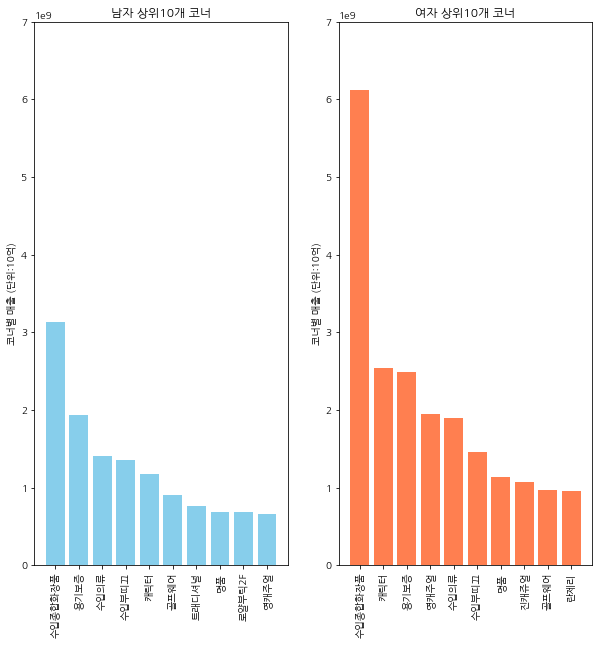

In [71]:
import matplotlib.ticker as ticker

plt.figure(figsize=(10,10))
grid=plt.GridSpec(1,2)

plt.subplot(grid[0,0])
plt.bar(corner_male.index,corner_male["amount"],color="skyblue")
plt.xticks(rotation=90)
plt.ylim(0,7000000000)
plt.ylabel("코너별 매출 (단위:10억)")
plt.title("남자 상위10개 코너")

plt.subplot(grid[0,1])
plt.bar(corner_female.index,corner_female["amount"],color="coral")
plt.xticks(rotation=90)
plt.ylim(0,7000000000)
plt.ylabel("코너별 매출 (단위:10억)")
plt.title("여자 상위10개 코너")

plt.show()

In [72]:
무역점_corner = 무역점.groupby(["corner","gender"]).sum()
본점_corner = 본점.groupby(["corner","gender"]).sum()
신촌점_corner = 신촌점.groupby(["corner","gender"]).sum()
천호점_corner = 천호점.groupby(["corner","gender"]).sum()

In [73]:
#각 지점별 남성 매출 상위 10개 코너
무역점_corner_male=무역점_corner.sort_values(by=["gender","amount"],ascending=False)["amount"].head(10)
무역점_corner_male=무역점_corner_male.reset_index()
무역점_corner_male.drop(["gender"],axis=1,inplace=True)
무역점_corner_male=무역점_corner_male.set_index("corner")
print(무역점_corner_male)

본점_corner_male=본점_corner.sort_values(by=["gender","amount"],ascending=False)["amount"].head(10)
본점_corner_male=본점_corner_male.reset_index()
본점_corner_male.drop(["gender"],axis=1,inplace=True)
본점_corner_male=본점_corner_male.set_index("corner")
print(본점_corner_male)

신촌점_corner_male=신촌점_corner.sort_values(by=["gender","amount"],ascending=False)["amount"].head(10)
신촌점_corner_male=신촌점_corner_male.reset_index()
신촌점_corner_male.drop(["gender"],axis=1,inplace=True)
신촌점_corner_male=신촌점_corner_male.set_index("corner")
print(신촌점_corner_male)

천호점_corner_male=천호점_corner.sort_values(by=["gender","amount"],ascending=False)["amount"].head(10)
천호점_corner_male=천호점_corner_male.reset_index()
천호점_corner_male.drop(["gender"],axis=1,inplace=True)
천호점_corner_male=천호점_corner_male.set_index("corner")
print(천호점_corner_male)

            amount
corner            
수입종합화장품  863319000
캐릭터      739391788
명품       687987000
로얄부틱2F   687091900
부띠끄      501606260
골프(국내)   431491100
타운웨어     412052100
영캐주얼     400633870
용기보증     398829912
아동복      396470470
             amount
corner             
수입의류     1410699950
수입부띠끄    1350463300
수입종합화장품  1344885320
용기보증      943946047
골프웨어      695987380
하이캐쥬얼     559144800
디자이너숍     511024250
영트랜드      476577230
국내부띠끄     457442800
트래디셔널     397800100
             amount
corner             
수입종합화장품   447257100
용기보증      325059912
영캐주얼      263033090
아동        230119230
골프웨어      208401150
트레디셔널캐주얼  188959800
싸롱화       152790900
영커리어캐주얼   127038300
베이직캐주얼    121575500
진캐주얼      119978460
             amount
corner             
수입종합화장품   473346000
엘레강스부틱    287275400
용기보증      271270692
캐릭터       225978660
진캐쥬얼      220408870
아동복       219842360
엘레강스      205546750
트래디셔널캐쥬얼  180411790
영캐쥬얼      171017420
캐릭터캐쥬얼    168315460


In [74]:
#각 지점별 여성 매출 상위 10개 코너
무역점_corner_female=무역점_corner.sort_values(by=["gender","amount"],ascending=[True,False])["amount"].head(10)
무역점_corner_female=무역점_corner_female.reset_index()
무역점_corner_female.drop(["gender"],axis=1,inplace=True)
무역점_corner_female=무역점_corner_female.set_index("corner")
print(무역점_corner_female)

본점_corner_female=본점_corner.sort_values(by=["gender","amount"],ascending=[True,False])["amount"].head(10)
본점_corner_female=본점_corner_female.reset_index()
본점_corner_female.drop(["gender"],axis=1,inplace=True)
본점_corner_female=본점_corner_female.set_index("corner")
print(본점_corner_female)

신촌점_corner_female=신촌점_corner.sort_values(by=["gender","amount"],ascending=[True,False])["amount"].head(10)
신촌점_corner_female=신촌점_corner_female.reset_index()
신촌점_corner_female.drop(["gender"],axis=1,inplace=True)
신촌점_corner_female=신촌점_corner_female.set_index("corner")
print(신촌점_corner_female)

천호점_corner_female=천호점_corner.sort_values(by=["gender","amount"],ascending=[True,False])["amount"].head(10)
천호점_corner_female=천호점_corner_female.reset_index()
천호점_corner_female.drop(["gender"],axis=1,inplace=True)
천호점_corner_female=천호점_corner_female.set_index("corner")
print(천호점_corner_female)

             amount
corner             
수입종합화장품  1812175740
캐릭터      1664911020
명품       1131441900
영캐주얼      932702310
로얄부틱2F    900346040
부띠끄       796309310
타운웨어      755957900
진캐쥬얼      624852070
용기보증      609374082
여성구두      529744900
             amount
corner             
수입종합화장품  1939134000
수입의류     1897820290
수입부띠끄    1452929500
하이캐쥬얼     894732420
용기보증      856880512
영트랜드      772330630
골프웨어      662499830
국내부띠끄     636724300
디자이너숍     558314800
트래디셔널     430916300
              amount
corner              
수입종합화장품   1310107500
영캐주얼      1010041340
용기보증       604820616
싸롱화        464452900
베이직캐주얼     422705460
영커리어캐주얼    385853440
아동         385571810
트렌드캐주얼     354416000
진캐주얼       336336280
트레디셔널캐주얼   330503920
             amount
corner             
수입종합화장품  1056962300
캐릭터       510191490
캐릭터캐쥬얼    495258250
영캐쥬얼      463399560
진캐쥬얼      444828800
엘레강스      428920800
용기보증      413848923
엘레강스부틱    360654280
아동복       321962100
캐릭터슈즈     315178350


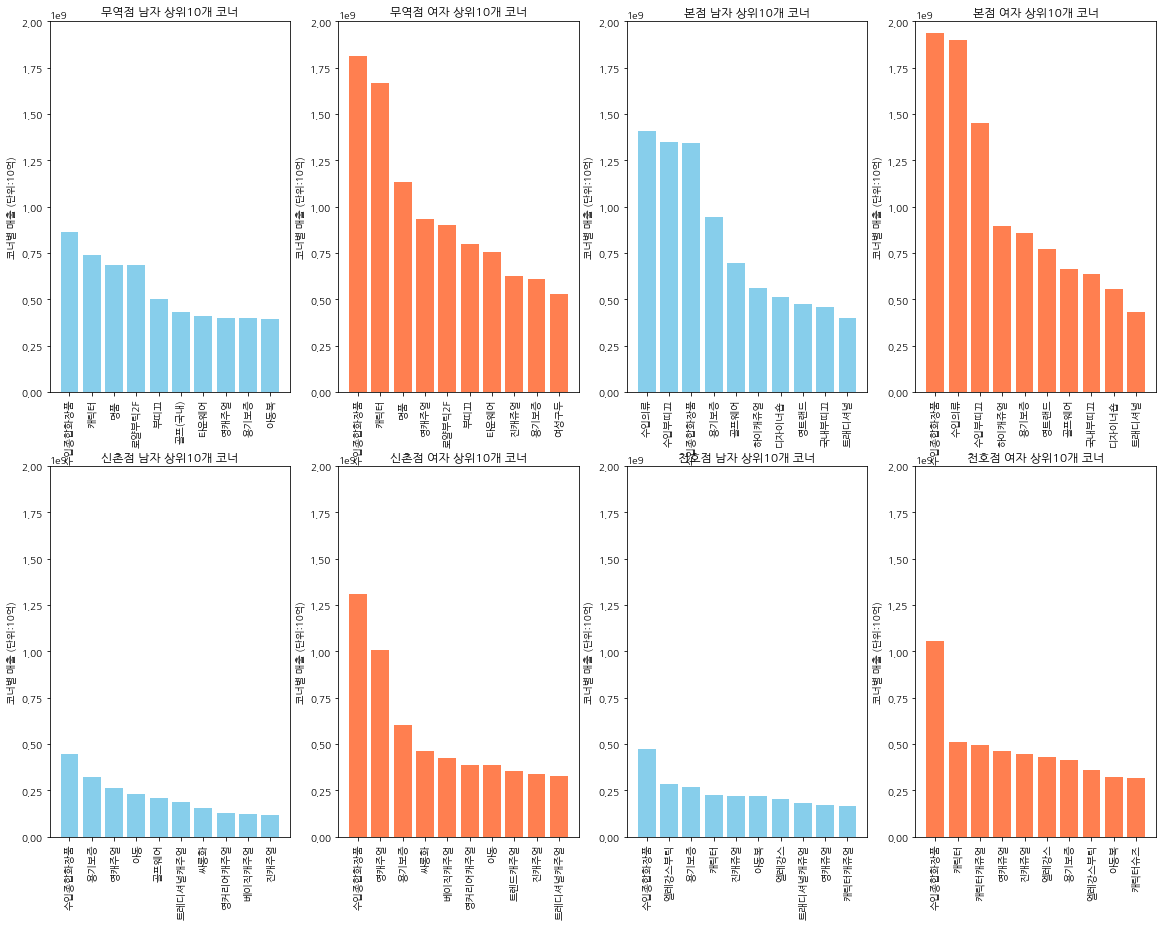

In [75]:
plt.figure(figsize=(25,15))
grid=plt.GridSpec(2,5)

#무역점
plt.subplot(grid[0,0])
plt.bar(무역점_corner_male.index,무역점_corner_male["amount"],color="skyblue")
plt.xticks(rotation=90)
plt.ylim(0,2000000000)
plt.ylabel("코너별 매출 (단위:10억)")
plt.title("무역점 남자 상위10개 코너")

plt.subplot(grid[0,1])
plt.bar(무역점_corner_female.index,무역점_corner_female["amount"],color="coral")
plt.xticks(rotation=90)
plt.ylim(0,2000000000)
plt.ylabel("코너별 매출 (단위:10억)")
plt.title("무역점 여자 상위10개 코너")


#본점
plt.subplot(grid[0,2])
plt.bar(본점_corner_male.index,본점_corner_male["amount"],color="skyblue")
plt.xticks(rotation=90)
plt.ylim(0,2000000000)
plt.ylabel("코너별 매출 (단위:10억)")
plt.title("본점 남자 상위10개 코너")

plt.subplot(grid[0,3])
plt.bar(본점_corner_female.index,본점_corner_female["amount"],color="coral")
plt.xticks(rotation=90)
plt.ylim(0,2000000000)
plt.ylabel("코너별 매출 (단위:10억)")
plt.title("본점 여자 상위10개 코너")



#신촌점
plt.subplot(grid[1,0])
plt.bar(신촌점_corner_male.index,신촌점_corner_male["amount"],color="skyblue")
plt.xticks(rotation=90)
plt.ylim(0,2000000000)
plt.ylabel("코너별 매출 (단위:10억)")
plt.title("신촌점 남자 상위10개 코너")

plt.subplot(grid[1,1])
plt.bar(신촌점_corner_female.index,신촌점_corner_female["amount"],color="coral")
plt.xticks(rotation=90)
plt.ylim(0,2000000000)
plt.ylabel("코너별 매출 (단위:10억)")
plt.title("신촌점 여자 상위10개 코너")




#천호점
plt.subplot(grid[1,2])
plt.bar(천호점_corner_male.index,천호점_corner_male["amount"],color="skyblue")
plt.xticks(rotation=90)
plt.ylim(0,2000000000)
plt.ylabel("코너별 매출 (단위:10억)")
plt.title("천호점 남자 상위10개 코너")

plt.subplot(grid[1,3])
plt.bar(천호점_corner_female.index,천호점_corner_female["amount"],color="coral")
plt.xticks(rotation=90)
plt.ylim(0,2000000000)
plt.ylabel("코너별 매출 (단위:10억)")
plt.title("천호점 여자 상위10개 코너")


plt.show()

### 성별 인기 있는 품목_ 브랜드

In [76]:
brand_sum = data.groupby(["brand","gender"]).sum()
brand_sum

custid           product  imported    amount  discount  \
brand   gender                                                             
012베네통  0       19627127  5928136326984550      1078  83836830   2600340   
        1       17589191  5380787924484874      1064  73506640   2722670   
1492    0        8694030  2369531894656400         0  32476200   1677700   
        1        3245388   862795805334122         0  11194500    649500   
1492마일즈 0       11297178  3257639865213128         0  41801500   2063150   
...                  ...               ...       ...       ...       ...   
휴먼앤휴먼   1         105202    30204307139866         0    538000         0   
흙침대     0         208750    63535933218216         0  26624320    923820   
        1          42419    18153123778507         0   7453160    113160   
희원상사    0         307212    86085390875368         0   1581000         0   
        1          79397    18123240184290         0    138000         0   

                installment  time_label  discount_rate   cnt  
brand   gender                                                
012베네통  0              2377        3450      36.071240  1343  
        1              2158        3081      41.581992  1219  
1492    0              1025        1713      27.300000   563  
        1               333         574      11.050000   205  
1492마일즈 0              1280        2091      34.215941   739  
...                     ...         ...            ...   ...  
휴먼앤휴먼   1                11          20       0.000000     7  
흙침대     0                77          37       0.479999    14  
        1                13          11       0.050001     4  
희원상사    0                38          48       0.000000    19  
        1                 4          10       0.000000     4  

[3634 rows x 9 columns]

In [77]:
brand_male=brand_sum.sort_values(by=["gender","amount"],ascending=False)["amount"].head(10)
brand_male=brand_male.reset_index()
brand_male.drop(["gender"],axis=1,inplace=True)
brand_male=brand_male.set_index("brand")
brand_male

,amount
brand,
식품,4173333269
시슬리,519461900
폴로,499269000
에스티로더,395657000
버버리,359432000
랑콤,296486220
지오다노,268804700
타임,267488000
삼성,250641950


In [78]:
brand_female=brand_sum.sort_values(by=["gender","amount"],ascending=[True,False])["amount"].head(10)
brand_female=brand_female.reset_index()
brand_female.drop(["gender"],axis=1,inplace=True)
brand_female=brand_female.set_index("brand")
brand_female

,amount
brand,
식품,5552432691
시슬리,862488320
에스티로더,800281000
랑콤,710491400
폴로,672086100
타임,533774000
아모레,487878800
샤넬,485431500
지오다노,476553400


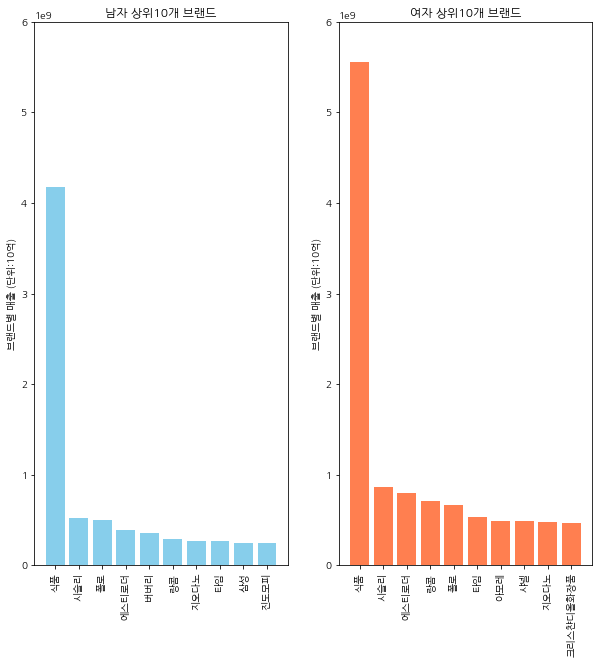

In [79]:
import matplotlib.ticker as ticker

plt.figure(figsize=(10,10))
grid=plt.GridSpec(1,2)

plt.subplot(grid[0,0])
plt.bar(brand_male.index,brand_male["amount"],color="skyblue")
plt.xticks(rotation=90)
plt.ylim(0,6000000000)
plt.ylabel("브랜드별 매출 (단위:10억)")
plt.title("남자 상위10개 브랜드")

plt.subplot(grid[0,1])
plt.bar(brand_female.index,brand_female["amount"],color="coral")
plt.xticks(rotation=90)
plt.ylim(0,6000000000)
plt.ylabel("브랜드별 매출 (단위:10억)")
plt.title("여자 상위10개 브랜드")

plt.show()

In [80]:
무역점_brand = 무역점.groupby(["brand","gender"]).sum()
본점_brand = 본점.groupby(["brand","gender"]).sum()
신촌점_brand = 신촌점.groupby(["brand","gender"]).sum()
천호점_brand = 천호점.groupby(["brand","gender"]).sum()

In [81]:
#각 지점별 남성 매출 상위 10개 브랜드
무역점_brand_male=무역점_brand.sort_values(by=["gender","amount"],ascending=False)["amount"].head(10)
무역점_brand_male=무역점_brand_male.reset_index()
무역점_brand_male.drop(["gender"],axis=1,inplace=True)
무역점_brand_male=무역점_brand_male.set_index("brand")
print(무역점_brand_male)

본점_brand_male=본점_brand.sort_values(by=["gender","amount"],ascending=False)["amount"].head(10)
본점_brand_male=본점_brand_male.reset_index()
본점_brand_male.drop(["gender"],axis=1,inplace=True)
본점_brand_male=본점_brand_male.set_index("brand")
print(본점_brand_male)

신촌점_brand_male=신촌점_brand.sort_values(by=["gender","amount"],ascending=False)["amount"].head(10)
신촌점_brand_male=신촌점_brand_male.reset_index()
신촌점_brand_male.drop(["gender"],axis=1,inplace=True)
신촌점_brand_male=신촌점_brand_male.set_index("brand")
print(신촌점_brand_male)

천호점_brand_male=천호점_brand.sort_values(by=["gender","amount"],ascending=False)["amount"].head(10)
천호점_brand_male=천호점_brand_male.reset_index()
천호점_brand_male.drop(["gender"],axis=1,inplace=True)
천호점_brand_male=천호점_brand_male.set_index("brand")
print(천호점_brand_male)

              amount
brand               
식품         963008897
폴로         152145900
시슬리        148791400
버버리        113855500
에스티로더      108218000
에뜨로        100137400
삼성          86868200
페라가모현대무역점   82936400
진도모피        82075000
지오다노        80724800
              amount
brand               
식품        1844760991
루이비통       219502000
시슬리        216814700
폴로         213149500
까르띠에본점     209120000
버버리        163990500
페라가모현대본점   153872500
에스티로더      136732000
타임         135190000
샤넬         127679020
           amount
brand            
식품      711163180
에스티로더    74533000
폴로       73619900
랑콤       70689000
샤넬       55213000
시슬리      54447100
피에르가르뎅   49241400
닥스       48756800
아모레      47850500
버버리      47317000
            amount
brand             
식품       654400201
시슬리       99408700
에스티로더     76174000
삼성        63274950
아모레       61977500
폴로        60353700
앨지        53657800
지아니베르사체   53515800
지오다노      51120300
빈폴        50539700


In [82]:
#각 지점별 여성 매출 상위 10개 코너
무역점_brand_female=무역점_brand.sort_values(by=["gender","amount"],ascending=[True,False])["amount"].head(10)
무역점_brand_female=무역점_brand_female.reset_index()
무역점_brand_female.drop(["gender"],axis=1,inplace=True)
무역점_brand_female=무역점_brand_female.set_index("brand")
print(무역점_brand_female)

본점_brand_female=본점_brand.sort_values(by=["gender","amount"],ascending=[True,False])["amount"].head(10)
본점_brand_female=본점_brand_female.reset_index()
본점_brand_female.drop(["gender"],axis=1,inplace=True)
본점_brand_female=본점_brand_female.set_index("brand")
print(본점_brand_female)

신촌점_brand_female=신촌점_brand.sort_values(by=["gender","amount"],ascending=[True,False])["amount"].head(10)
신촌점_brand_female=신촌점_brand_female.reset_index()
신촌점_brand_female.drop(["gender"],axis=1,inplace=True)
신촌점_brand_female=신촌점_brand_female.set_index("brand")
print(신촌점_brand_female)

천호점_brand_female=천호점_brand.sort_values(by=["gender","amount"],ascending=[True,False])["amount"].head(10)
천호점_brand_female=천호점_brand_female.reset_index()
천호점_brand_female.drop(["gender"],axis=1,inplace=True)
천호점_brand_female=천호점_brand_female.set_index("brand")
print(천호점_brand_female)

               amount
brand                
식품         1504132437
시슬리         266402320
에스티로더       232142000
폴로          226679200
랑콤          197236500
에뜨로         188514500
페라가모현대무역점   178078500
타임          157994000
버버리         152527500
크리스챤디올화장품   147799000
                 amount
brand                  
식품           1735306110
구찌            291955000
루이비통          291438800
시슬리           286281200
폴로            224972400
페라가모현대본점      200020870
샤넬            193815000
에스티로더         188645000
에르메스부틱현대백화점   187255000
아베다           183932900
           amount
brand            
식품     1361324808
에스티로더   217426000
랑콤      213218800
크리니크    155327000
샤넬      154005400
아모레     138459400
타임      133961000
지오다노    127840100
시슬리     127158600
삼성      124547900
           amount
brand            
식품      951669336
시슬리     182646200
에스티로더   162068000
아모레     138064500
샤넬      137495100
랑콤      136804100
지오다노    102938700
폴로      101469400
삼성      101376000
피에르가르뎅   97781600


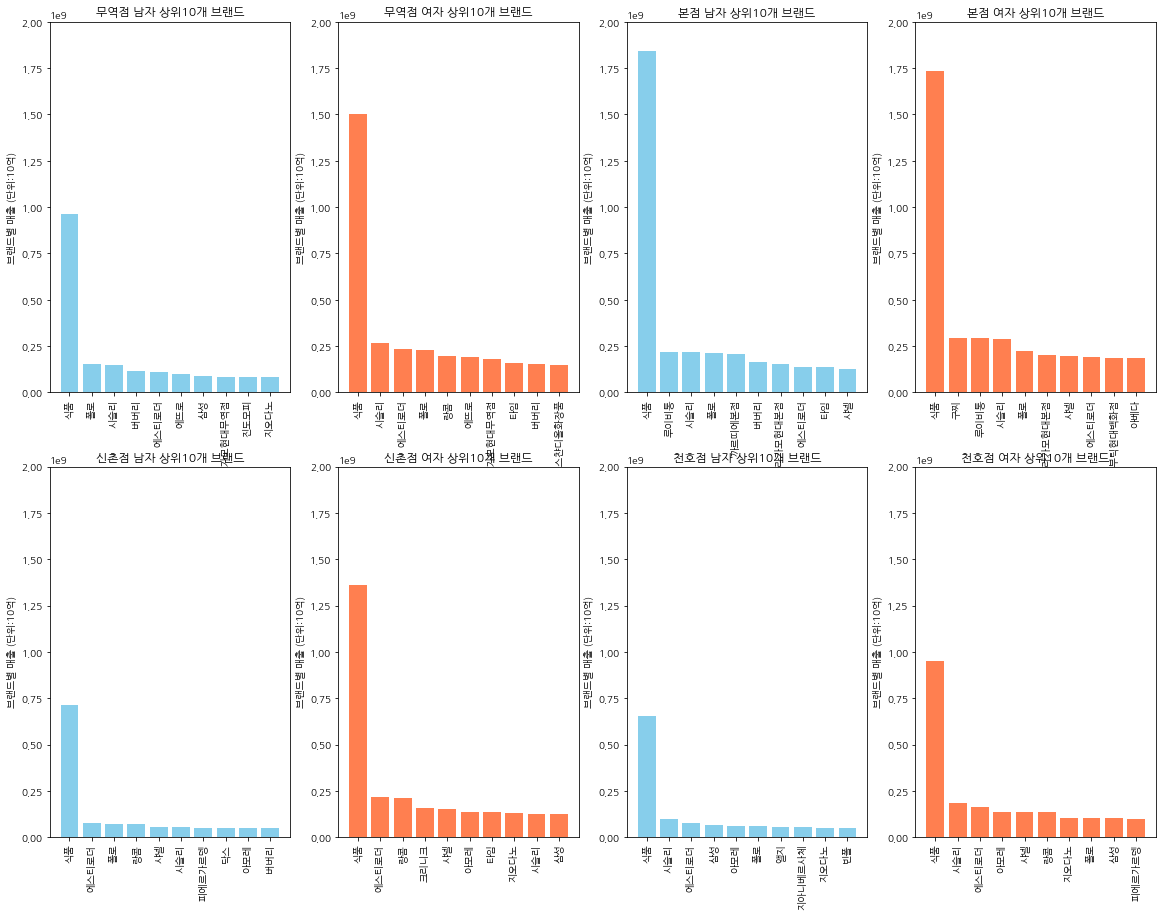

In [83]:
plt.figure(figsize=(25,15))
grid=plt.GridSpec(2,5)

#무역점
plt.subplot(grid[0,0])
plt.bar(무역점_brand_male.index,무역점_brand_male["amount"],color="skyblue")
plt.xticks(rotation=90)
plt.ylim(0,2000000000)
plt.ylabel("브랜드별 매출 (단위:10억)")
plt.title("무역점 남자 상위10개 브랜드")

plt.subplot(grid[0,1])
plt.bar(무역점_brand_female.index,무역점_brand_female["amount"],color="coral")
plt.xticks(rotation=90)
plt.ylim(0,2000000000)
plt.ylabel("브랜드별 매출 (단위:10억)")
plt.title("무역점 여자 상위10개 브랜드")


#본점
plt.subplot(grid[0,2])
plt.bar(본점_brand_male.index,본점_brand_male["amount"],color="skyblue")
plt.xticks(rotation=90)
plt.ylim(0,2000000000)
plt.ylabel("브랜드별 매출 (단위:10억)")
plt.title("본점 남자 상위10개 브랜드")

plt.subplot(grid[0,3])
plt.bar(본점_brand_female.index,본점_brand_female["amount"],color="coral")
plt.xticks(rotation=90)
plt.ylim(0,2000000000)
plt.ylabel("브랜드별 매출 (단위:10억)")
plt.title("본점 여자 상위10개 브랜드")



#신촌점
plt.subplot(grid[1,0])
plt.bar(신촌점_brand_male.index,신촌점_brand_male["amount"],color="skyblue")
plt.xticks(rotation=90)
plt.ylim(0,2000000000)
plt.ylabel("브랜드별 매출 (단위:10억)")
plt.title("신촌점 남자 상위10개 브랜드")

plt.subplot(grid[1,1])
plt.bar(신촌점_brand_female.index,신촌점_brand_female["amount"],color="coral")
plt.xticks(rotation=90)
plt.ylim(0,2000000000)
plt.ylabel("브랜드별 매출 (단위:10억)")
plt.title("신촌점 여자 상위10개 브랜드")



#천호점
plt.subplot(grid[1,2])
plt.bar(천호점_brand_male.index,천호점_brand_male["amount"],color="skyblue")
plt.xticks(rotation=90)
plt.ylim(0,2000000000)
plt.ylabel("브랜드별 매출 (단위:10억)")
plt.title("천호점 남자 상위10개 브랜드")

plt.subplot(grid[1,3])
plt.bar(천호점_brand_female.index,천호점_brand_female["amount"],color="coral")
plt.xticks(rotation=90)
plt.ylim(0,2000000000)
plt.ylabel("브랜드별 매출 (단위:10억)")
plt.title("천호점 여자 상위10개 브랜드")

plt.show()

In [84]:
data[(data['corner']=="골프웨어") & (data['store']!="신촌점")]

,custid,date_time,store,product,brand,corner,pc,part,imported,amount,discount,installment,gender,time_label,discount_rate,cnt
35,1,2001-04-15 18:40,본점,4408170025000,엘로드,골프웨어,골프,남성정장스포츠,0,188000,9400,3,1,4,0.05,1
95,5,2000-08-31 11:00,본점,4406190025000,블랙앤화이트,골프웨어,골프,남성정장스포츠,1,57200,5720,1,1,1,0.10,1
99,5,2000-09-22 11:40,본점,4406190025000,블랙앤화이트,골프웨어,골프,남성정장스포츠,1,682000,68200,3,1,1,0.10,1
114,6,2000-05-03 15:10,본점,4400551026970,임페리얼,골프웨어,골프,남성정장스포츠,0,-35000,0,1,1,3,-0.00,1
127,6,2000-08-13 18:50,본점,4400540025000,라코스떼,골프웨어,골프,남성정장스포츠,0,93000,9300,3,1,4,0.10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036492,29994,2000-05-07 14:50,본점,4404830025000,레노마골프,골프웨어,골프,남성정장스포츠,0,38000,1900,1,0,2,0.05,1
1036500,29994,2000-12-04 15:40,본점,4406050026975,닥스골프,골프웨어,골프,남성정장스포츠,0,90000,0,3,0,3,0.00,1
1036501,29994,2000-12-04 15:40,본점,4406050026975,닥스골프,골프웨어,골프,남성정장스포츠,0,96000,0,3,0,3,0.00,1
1036502,29994,2000-12-04 15:40,본점,4406050026975,닥스골프,골프웨어,골프,남성정장스포츠,0,60000,0,3,0,3,0.00,1


### 점포별 고객수

In [85]:
본점_cust_cnt = 본점_male_cnt + 본점_female_cnt
무역점_cust_cnt = 무역점_male_cnt + 무역점_female_cnt
신촌점_cust_cnt = 신촌점_male_cnt + 신촌점_female_cnt
천호점_cust_cnt = 천호점_male_cnt + 천호점_female_cnt

print(본점_cust_cnt)
print(무역점_cust_cnt)
print(신촌점_cust_cnt)
print(천호점_cust_cnt)

14327
16108
11632
7645


Text(0, 0.5, '고객수 (단위: 명)')

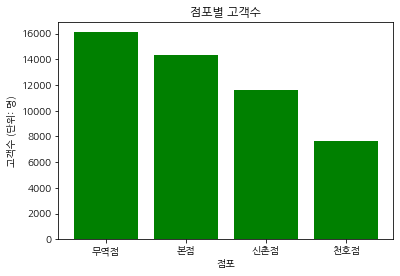

In [86]:
x_list = ['무역점','본점','신촌점','천호점']
y_list = [무역점_cust_cnt,본점_cust_cnt,신촌점_cust_cnt,천호점_cust_cnt]
plt.bar(x_list,y_list,color='green')
plt.title('점포별 고객수')
plt.xlabel('점포')
plt.ylabel('고객수 (단위: 명)')

# DB작업

## store

In [184]:
storename = list(data['store'].unique())
storename

['무역점', '본점', '천호점', '신촌점']

In [185]:
import  pymysql.cursors 

connection = pymysql.connect(host='localhost', port=3306, user='gyetol', password='gyetory', db='hyundai_department')

try:
    with connection.cursor() as cursor:
        for item in storename:
            sql = "INSERT INTO store (store_name) VALUES ('{}');".format(item)
            cursor.execute(sql)
        connection.commit()
except Exception as e:
    connection.rollback()
    print('error : {}'.format(e))
finally:
    connection.close()

## customer

In [186]:
customer = data[['custid','gender']]
customer

,custid,gender
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1036648,29998,0
1036649,29998,0
1036650,29999,0
1036651,29999,0


In [187]:
customer=customer.drop_duplicates()
customer

,custid,gender
0,0,1
11,1,1
37,2,1
48,3,0
78,4,0
...,...,...
1036522,29995,1
1036598,29996,0
1036617,29997,1
1036637,29998,0


In [188]:
gender = list(customer['gender'])
gender

[1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,


In [189]:
import  pymysql.cursors 

connection = pymysql.connect(host='localhost', port=3306, user='gyetol', password='gyetory', db='hyundai_department')

try:
    with connection.cursor() as cursor:
        for item in gender:
            sql = "INSERT INTO customer (gender) VALUES ({});".format(item)
            cursor.execute(sql)
        connection.commit()
except Exception as e:
    connection.rollback()
    print('error : {}'.format(e))
finally:
    connection.close()
    
# 주의 : custid는 0이 아니라, 1부터 들어가게 되있다 (auto_increment)

## part

In [190]:
partname = list(data['part'].unique())
partname

['명품잡화',
 '잡화파트',
 '남성의류',
 '골프/유니캐쥬얼',
 '로얄부띠끄',
 '케주얼,구두,아동',
 '여성캐주얼',
 '여성의류파트',
 '가정용품',
 '가정용품파트',
 '남성정장스포츠',
 '아동',
 '잡화',
 '영어덜트캐쥬얼',
 '영라이브',
 '공산품',
 '스포츠캐쥬얼',
 '여성정장',
 '아동문화',
 '공산품파트',
 '생식품파트',
 '영플라자',
 '생식품',
 '패션잡화',
 '아동,스포츠',
 '로얄부틱',
 '여성캐쥬얼',
 '스포츠캐주얼',
 '영캐릭터',
 '상품개발영업1과',
 '인터넷백화점']

In [191]:
import  pymysql.cursors 

connection = pymysql.connect(host='localhost', port=3306, user='gyetol', password='gyetory', db='hyundai_department')

try:
    with connection.cursor() as cursor:
        for item in partname:
            sql = "INSERT INTO part (part_name) VALUES ('{}');".format(item)
            cursor.execute(sql)
        connection.commit()
except Exception as e:
    connection.rollback()
    print('error : {}'.format(e))
finally:
    connection.close()

## pc

In [192]:
# DB에서 part 가져오기
import pymysql

db = pymysql.connect(host='localhost', port=3306, user='gyetol', password='gyetory', db='hyundai_department')

cursor = db.cursor()

sql = "SELECT * FROM part"

partid_list = []
partname_list = []
try:
    cursor.execute(sql)
    results = cursor.fetchall()
    for row in results:
        partid_list.append(row[0])
        partname_list.append(row[1])
except:
    print ("Error: unable to fetch data")

db.close()

In [193]:
part_dic = dict(zip(partname_list,partid_list))
part_dic

{'명품잡화': 1,
 '잡화파트': 2,
 '남성의류': 3,
 '골프/유니캐쥬얼': 4,
 '로얄부띠끄': 5,
 '케주얼,구두,아동': 6,
 '여성캐주얼': 7,
 '여성의류파트': 8,
 '가정용품': 9,
 '가정용품파트': 10,
 '남성정장스포츠': 11,
 '아동': 12,
 '잡화': 13,
 '영어덜트캐쥬얼': 14,
 '영라이브': 15,
 '공산품': 16,
 '스포츠캐쥬얼': 17,
 '여성정장': 18,
 '아동문화': 19,
 '공산품파트': 20,
 '생식품파트': 21,
 '영플라자': 22,
 '생식품': 23,
 '패션잡화': 24,
 '아동,스포츠': 25,
 '로얄부틱': 26,
 '여성캐쥬얼': 27,
 '스포츠캐주얼': 28,
 '영캐릭터': 29,
 '상품개발영업1과': 30,
 '인터넷백화점': 31}

In [194]:
# pc와 part 컬럼만 가져오기
pcpart = data[['pc','part']]
pcpart

,pc,part
0,화장품,명품잡화
1,화장품,명품잡화
2,화장품,잡화파트
3,명품토탈,잡화파트
4,화장품,명품잡화
...,...,...
1036648,트랜디 케쥬얼,여성캐주얼
1036649,화장품,명품잡화
1036650,핸드백,잡화
1036651,셔츠,남성의류


In [195]:
# pc와 part컬럼쌍의 중복제거
pcpart=pcpart.drop_duplicates()
pcpart

,pc,part
0,화장품,명품잡화
2,화장품,잡화파트
3,명품토탈,잡화파트
5,캐릭터정장,남성의류
6,트래디셔널,골프/유니캐쥬얼
...,...,...
893700,명품시즌,공산품
939656,식기,영라이브
955983,트랜디 케쥬얼,남성의류
961540,사이버쇼핑,인터넷백화점


In [196]:
partname = list(pcpart['part'])
partname

['명품잡화',
 '잡화파트',
 '잡화파트',
 '남성의류',
 '골프/유니캐쥬얼',
 '로얄부띠끄',
 '케주얼,구두,아동',
 '케주얼,구두,아동',
 '케주얼,구두,아동',
 '여성캐주얼',
 '여성의류파트',
 '가정용품',
 '잡화파트',
 '잡화파트',
 '여성캐주얼',
 '가정용품파트',
 '남성정장스포츠',
 '가정용품',
 '아동',
 '잡화',
 '영어덜트캐쥬얼',
 '영라이브',
 '공산품',
 '영라이브',
 '스포츠캐쥬얼',
 '아동',
 '스포츠캐쥬얼',
 '가정용품',
 '남성의류',
 '명품잡화',
 '가정용품',
 '영어덜트캐쥬얼',
 '스포츠캐쥬얼',
 '여성정장',
 '케주얼,구두,아동',
 '남성정장스포츠',
 '아동문화',
 '남성정장스포츠',
 '공산품파트',
 '생식품파트',
 '생식품파트',
 '케주얼,구두,아동',
 '남성정장스포츠',
 '공산품파트',
 '생식품파트',
 '케주얼,구두,아동',
 '공산품파트',
 '아동문화',
 '여성의류파트',
 '공산품파트',
 '케주얼,구두,아동',
 '영플라자',
 '가정용품파트',
 '영플라자',
 '생식품',
 '공산품',
 '공산품파트',
 '생식품',
 '공산품',
 '생식품',
 '생식품',
 '여성캐주얼',
 '여성캐주얼',
 '공산품',
 '패션잡화',
 '패션잡화',
 '생식품파트',
 '패션잡화',
 '명품잡화',
 '여성정장',
 '명품잡화',
 '골프/유니캐쥬얼',
 '골프/유니캐쥬얼',
 '아동,스포츠',
 '아동,스포츠',
 '명품잡화',
 '아동,스포츠',
 '패션잡화',
 '패션잡화',
 '케주얼,구두,아동',
 '생식품',
 '공산품',
 '명품잡화',
 '로얄부틱',
 '여성정장',
 '여성캐쥬얼',
 '공산품',
 '남성의류',
 '남성의류',
 '스포츠캐주얼',
 '영플라자',
 '패션잡화',
 '스포츠캐주얼',
 '여성정장',
 '영캐릭터',
 '스포츠캐주얼',
 '가정용품',
 '여성정장',
 '잡화',
 '영캐릭터',
 '패션잡화',

In [197]:
# partname을 딕셔너리의 key로 사용해서 value값(partname에 해당하는 partid) 얻기
part_id = []
for i in partname:
    part_id.append(part_dic[i])
part_id

[1,
 2,
 2,
 3,
 4,
 5,
 6,
 6,
 6,
 7,
 8,
 9,
 2,
 2,
 7,
 10,
 11,
 9,
 12,
 13,
 14,
 15,
 16,
 15,
 17,
 12,
 17,
 9,
 3,
 1,
 9,
 14,
 17,
 18,
 6,
 11,
 19,
 11,
 20,
 21,
 21,
 6,
 11,
 20,
 21,
 6,
 20,
 19,
 8,
 20,
 6,
 22,
 10,
 22,
 23,
 16,
 20,
 23,
 16,
 23,
 23,
 7,
 7,
 16,
 24,
 24,
 21,
 24,
 1,
 18,
 1,
 4,
 4,
 25,
 25,
 1,
 25,
 24,
 24,
 6,
 23,
 16,
 1,
 26,
 18,
 27,
 16,
 3,
 3,
 28,
 22,
 24,
 28,
 18,
 29,
 28,
 9,
 18,
 13,
 29,
 24,
 23,
 2,
 11,
 1,
 4,
 8,
 18,
 9,
 13,
 27,
 13,
 9,
 19,
 16,
 23,
 3,
 3,
 9,
 23,
 3,
 24,
 24,
 21,
 21,
 20,
 10,
 16,
 25,
 20,
 24,
 10,
 7,
 16,
 21,
 17,
 9,
 22,
 1,
 12,
 7,
 28,
 22,
 6,
 11,
 15,
 8,
 18,
 18,
 24,
 29,
 25,
 13,
 2,
 20,
 5,
 3,
 11,
 4,
 16,
 27,
 3,
 11,
 24,
 7,
 17,
 7,
 10,
 21,
 14,
 8,
 6,
 7,
 2,
 6,
 4,
 11,
 4,
 30,
 3,
 24,
 17,
 23,
 16,
 24,
 13,
 11,
 23,
 14,
 4,
 15,
 18,
 9,
 12,
 24,
 13,
 6,
 27,
 6,
 25,
 16,
 15,
 3,
 31,
 7]

In [198]:
pcpart['partid'] = part_id
pcpart

C:\Anaconda3\envs\study\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,pc,part,partid
0,화장품,명품잡화,1
2,화장품,잡화파트,2
3,명품토탈,잡화파트,2
5,캐릭터정장,남성의류,3
6,트래디셔널,골프/유니캐쥬얼,4
...,...,...,...
893700,명품시즌,공산품,16
939656,식기,영라이브,15
955983,트랜디 케쥬얼,남성의류,3
961540,사이버쇼핑,인터넷백화점,31


In [199]:
pcname = list(pcpart['pc'])
pcname

['화장품',
 '화장품',
 '명품토탈',
 '캐릭터정장',
 '트래디셔널',
 '로얄부띠끄',
 '아동복',
 '내의란제리',
 '영트렌디',
 '캐릭터캐쥬얼',
 '여성캐주얼',
 '가전',
 '섬유잡화',
 '장신구',
 '트랜디 케쥬얼',
 '식기',
 '골프',
 '수예',
 '유아/완구',
 '화장품',
 '패션슈즈',
 '영트랜디',
 '조리식품',
 '진캐주얼',
 '스포츠',
 '아동',
 '트래디셔널캐쥬얼',
 '가전/문화',
 '셔츠',
 '란제리',
 '식기',
 '영캐릭터캐쥬얼',
 '골프',
 '엘레강스캐쥬얼',
 '트레디셔널',
 '정장',
 '아동',
 '스포츠',
 '일반식품',
 '축산물',
 '미확인pc',
 '진케주얼',
 '캐릭터정장',
 '농산물',
 '농산물',
 '문화용품',
 '생활용품',
 '문화',
 '니트,단품,모피',
 '조리식품',
 '미확인pc',
 '진캐주얼',
 '가전',
 '소품',
 '수산물',
 '미확인pc',
 '미확인pc',
 '조리식품',
 '농산물',
 '미확인pc',
 '농산물',
 '미씨캐주얼',
 '타운란제리',
 '일반식품',
 '화장품',
 '피혁A',
 '수산물',
 '장신구',
 '여성구두',
 '디자이너부띠크',
 '핸드백',
 '진캐쥬얼',
 '골프',
 '아동',
 '문화',
 '명품시즌',
 '스포츠',
 '란제리',
 '여성구두',
 '남여구두',
 '쇼핑보증',
 '쇼핑보증',
 '수입명품',
 '로얄부틱',
 '디자이너부틱',
 '미씨캐릭터',
 '생활용품',
 '캐쥬얼',
 '캐주얼',
 '스포츠',
 '영캐주얼',
 '섬유',
 '골프',
 '수입명품',
 '어덜트캐주얼',
 '트래디셔널',
 '침구수예',
 '디자이너부띠끄',
 '악세사리',
 '캐릭터캐주얼',
 '피혁B',
 '일반식품',
 '핸드백',
 '셔츠',
 '장신구',
 '쇼핑보증',
 '디자이너부띠끄',
 '니트/단품',
 '침구/수예',
 '핸드백',
 '엘레강스캐쥬얼',
 '섬유',
 '미

In [200]:
#방법 1 : 데이터프레임의 각 열을 리스트로 쪼개서 넣는다

import  pymysql.cursors 

connection = pymysql.connect(host='localhost', port=3306, user='gyetol', password='gyetory', db='hyundai_department')

try:
    with connection.cursor() as cursor:
        for i in range(len(pcname)):
            sql = "INSERT INTO pc (pc_name,part_id) VALUES ('{}',{});".format(pcname[i],part_id[i])
            cursor.execute(sql)
        connection.commit()
except Exception as e:
    connection.rollback()
    print('error : {}'.format(e))
finally:
    connection.close()

In [201]:
# 방법 2 : 데이터프레임을 그대로 이용한다

# import  pymysql.cursors 

# connection = pymysql.connect(host='localhost', port=3306, user='gyetol', password='gyetory', db='hyundai_department')

# try:
#     with connection.cursor() as cursor:
#         for pcname,partid in zip(pcpart['pc'],pcpart['partid']):
#             sql = "INSERT INTO pc (pc_name,part_id) VALUES ('{}',{});".format(pcname,partid)
#             cursor.execute(sql)
#         connection.commit()
# except Exception as e:
#     connection.rollback()
#     print('error : {}'.format(e))
# finally:
#     connection.close()

## corner

In [211]:
# DB에서 pc 가져오기
import pymysql

db = pymysql.connect(host='localhost', port=3306, user='gyetol', password='gyetory', db='hyundai_department')

cursor = db.cursor()

sql = "SELECT * FROM pc"

pcid_list = []
pcname_list = []
partid_list = []
try:
    cursor.execute(sql)
    results = cursor.fetchall()
    for row in results:
        pcid_list.append(row[0])
        pcname_list.append(row[1])
        partid_list.append(row[2])
except:
    print ("Error: unable to fetch data")

db.close()

In [213]:
print(len(pcid_list))
print(len(pcname_list))
print(len(partid_list))

205
205
205


In [229]:
pcpartpartid = pd.DataFrame()
pcpartpartid['pcid'] = pcid_list
pcpartpartid['pcname']= pcname_list
pcpartpartid['partid'] = partid_list
pcpartpartid

,pcid,pcname,partid
0,1,화장품,1
1,2,화장품,2
2,3,명품토탈,2
3,4,캐릭터정장,3
4,5,트래디셔널,4
...,...,...,...
200,201,명품시즌,16
201,202,식기,15
202,203,트랜디 케쥬얼,3
203,204,사이버쇼핑,31


In [206]:
# corner,pc,part 컬럼만 가져오기
cornerpcpart = data[['corner','pc','part']]
cornerpcpart

,corner,pc,part
0,수입종합화장품,화장품,명품잡화
1,수입종합화장품,화장품,명품잡화
2,수입종합화장품,화장품,잡화파트
3,수입의류,명품토탈,잡화파트
4,수입종합화장품,화장품,명품잡화
...,...,...,...
1036648,영캐주얼,트랜디 케쥬얼,여성캐주얼
1036649,수입종합화장품,화장품,명품잡화
1036650,핸드백,핸드백,잡화
1036651,넥타이,셔츠,남성의류


In [218]:
# corner,pc,part 컬럼쌍의 중복제거
cornerpcpart=cornerpcpart.drop_duplicates()
cornerpcpart

,corner,pc,part
0,수입종합화장품,화장품,명품잡화
2,수입종합화장품,화장품,잡화파트
3,수입의류,명품토탈,잡화파트
5,캐릭터캐주얼,캐릭터정장,남성의류
6,트래디셔널,트래디셔널,골프/유니캐쥬얼
...,...,...,...
939656,욕실용품,식기,영라이브
955983,영캐주얼,트랜디 케쥬얼,남성의류
955986,영트랜디,트랜디 케쥬얼,남성의류
961540,홈쇼핑,사이버쇼핑,인터넷백화점


In [221]:
cornername = list(cornerpcpart['corner'])
cornername
len(cornername)

654

In [222]:
cornername

['수입종합화장품',
 '수입종합화장품',
 '수입의류',
 '캐릭터캐주얼',
 '트래디셔널',
 '로얄수입행사',
 '아동특선',
 '유아복',
 '수입부띠끄',
 '란제리',
 '영트랜드',
 '캐릭터',
 '미시케쥬얼',
 '색조화장품',
 '가전특정',
 '스카프',
 '헤어ACC',
 '영캐주얼',
 '주방용품',
 '골프웨어',
 '브랜드침구',
 '유아복',
 '수입종합화장품',
 '캐릭터슈즈',
 '행사',
 '즉석조리',
 '진캐쥬얼',
 '스포츠슈즈',
 '아동복',
 '트래디셔널캐쥬얼',
 '영캐쥬얼',
 '취사소형',
 '넥타이',
 '미확인코너',
 '란제리',
 '셔츠',
 '욕실용품',
 '스포츠단품',
 '캐릭터캐쥬얼',
 '골프(LC)',
 '행사',
 '니트웨어',
 '트래디셔널',
 '내셔날',
 '유아',
 '미확인코너',
 '아동',
 '국내부띠끄',
 '수영복',
 '냉장식품',
 '수입',
 '정육',
 '용기보증',
 '스포츠슈즈',
 '진케주얼',
 '캐릭터캐주얼',
 '스포츠웨어',
 '야채',
 '야채',
 '미확인코너',
 '하이캐쥬얼',
 '팬시',
 '음료',
 '가정잡화',
 '문화',
 '타운단품',
 '임대을',
 '양말',
 '내의',
 '차류',
 '즉석조리',
 '용기보증',
 '진캐주얼',
 '모자',
 '임대을가전',
 '취미소품',
 '생선',
 '용기보증',
 '주방용품',
 '용기보증',
 '즉석조리',
 '야채',
 '용기보증',
 '야채',
 '미씨캐릭터',
 '란제리',
 '통병조림',
 '수입종합화장품',
 '싸롱화',
 '조미료',
 '건식품',
 '헤어ACC',
 '여성구두',
 '모피니트',
 '행사',
 '진캐쥬얼',
 '골프(국내)',
 '신생아',
 '색조화장품',
 '임대화장품',
 '완구(문화)',
 '스타킹',
 '소형전기',
 '머플러',
 '아웃도어',
 '타운웨어',
 '행사',
 '여성구두',
 '캐쥬얼구두',
 '잡화',
 '화장잡화',
 '테이프',
 '

In [ ]:
pcpart = list(cornerpcpart['corner'])